<a href="https://colab.research.google.com/github/hyunj941031/Preprocessing/blob/main/game_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload();

Saving vgames2.csv to vgames2.csv


# 데이터 탐색

In [3]:
df = pd.read_csv('vgames2.csv')

# 파일 내의 index 컬럼 제거
df = df.drop(df.columns[0], axis=1)
df.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
0           Destineer     0.04        0        0           0  
1  Namco Bandai Games     0.17        0        0        0.01  
2           Alchemist        0        0     0.02           0  
3           Zoo Games     0.04        0        0           0  
4         D3Publisher     0.12     0.09        0        0.04

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
# 결측값이 전체 데이터에 비해 적은 개수(2% 내외)이므로 결측값 제거
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [6]:
# index 재정렬
df = df.reset_index(drop=True)
df.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
0           Destineer     0.04        0        0           0  
1  Namco Bandai Games     0.17        0        0        0.01  
2           Alchemist        0        0     0.02           0  
3           Zoo Games     0.04        0        0           0  
4         D3Publisher     0.12     0.09        0        0.04

In [7]:
# 중복 데이터 확인
df.duplicated().sum()

0

In [8]:
df.shape

(16241, 9)

In [9]:
pd.set_option('display.max_rows', None)

# 데이터 정제

## 각 컬럼 별 변수 분포 확인

In [10]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [12]:
df['Publisher'].value_counts()

Electronic Arts                           1332
Activision                                 963
Namco Bandai Games                         924
Ubisoft                                    913
Konami Digital Entertainment               821
THQ                                        711
Nintendo                                   692
Sony Computer Entertainment                679
Sega                                       631
Take-Two Interactive                       411
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                230
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          195
Midway Games                               195
505 Games                                  191
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [13]:
df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
11.0        10
9.0         10
8.0         10
1980.0       8
10.0         7
3.0          7
6.0          7
16.0         5
15.0         5
5.0          4
4.0          4
95.0         4
98.0         3
7.0          3
96.0         3
2017.0       3
2.0          3
0.0          3
14.0         2
1.0          2
97.0         2
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, dtype: int64

## 판매량(Sales) 변수값 정리

In [14]:
df_clean = df.copy()

df_clean['NA_Sales_Num'] = df_clean.NA_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['NA_Sales_size'] = df_clean.NA_Sales.str.extract(r'([a-zA-Z])')

df_clean['EU_Sales_Num'] = df_clean.EU_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['EU_Sales_size'] = df_clean.EU_Sales.str.extract(r'([a-zA-Z])')

df_clean['JP_Sales_Num'] = df_clean.JP_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['JP_Sales_size'] = df_clean.JP_Sales.str.extract(r'([a-zA-Z])')

df_clean['Other_Sales_Num'] = df_clean.Other_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['Other_Sales_size'] = df_clean.Other_Sales.str.extract(r'([a-zA-Z])')

df_clean = df_clean.drop('NA_Sales', axis=1)
df_clean = df_clean.drop('EU_Sales', axis=1)
df_clean = df_clean.drop('JP_Sales', axis=1)
df_clean = df_clean.drop('Other_Sales', axis=1)

df_clean.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher  NA_Sales_Num NA_Sales_size  EU_Sales_Num EU_Sales_size  \
0           Destineer          0.04           NaN          0.00           NaN   
1  Namco Bandai Games          0.17           NaN          0.00           NaN   
2           Alchemist          0.00           NaN          0.00           NaN   
3           Zoo Games          0.04           NaN          0.00           NaN   
4         D3Publisher          0.12           NaN          0.09           NaN   

   JP_Sales_Num JP_Sales_size  Other_Sales_Num Other_Sales_size  
0          0.00           NaN             0.00              NaN  
1          0.00           NaN             0.01              NaN  
2          0.02           NaN             0.00              NaN  
3          0.00           NaN             0.00              NaN  
4          0.00           NaN             0.04              NaN

## Platform, Genre, Publisher 카테고리화

In [15]:
df_clean['Platform'] = df_clean['Platform'].astype('category')
df_clean['Genre'] = df_clean['Genre'].astype('category')
df_clean['Publisher'] = df_clean['Publisher'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16241 non-null  object  
 1   Platform          16241 non-null  category
 2   Year              16241 non-null  float64 
 3   Genre             16241 non-null  category
 4   Publisher         16241 non-null  category
 5   NA_Sales_Num      16241 non-null  float64 
 6   NA_Sales_size     191 non-null    object  
 7   EU_Sales_Num      16241 non-null  float64 
 8   EU_Sales_size     195 non-null    object  
 9   JP_Sales_Num      16241 non-null  float64 
 10  JP_Sales_size     196 non-null    object  
 11  Other_Sales_Num   16241 non-null  float64 
 12  Other_Sales_size  197 non-null    object  
dtypes: category(3), float64(5), object(5)
memory usage: 1.3+ MB


## Year 정수 변환 및 이상치 제거

In [16]:
df_clean['Year'] = df_clean['Year'].astype('int')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16241 non-null  object  
 1   Platform          16241 non-null  category
 2   Year              16241 non-null  int64   
 3   Genre             16241 non-null  category
 4   Publisher         16241 non-null  category
 5   NA_Sales_Num      16241 non-null  float64 
 6   NA_Sales_size     191 non-null    object  
 7   EU_Sales_Num      16241 non-null  float64 
 8   EU_Sales_size     195 non-null    object  
 9   JP_Sales_Num      16241 non-null  float64 
 10  JP_Sales_size     196 non-null    object  
 11  Other_Sales_Num   16241 non-null  float64 
 12  Other_Sales_size  197 non-null    object  
dtypes: category(3), float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [17]:
df_clean = df_clean[df_clean.Year > 1000].reset_index(drop=True)
df_clean['Year'].value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
2006     998
2005     930
2002     823
2003     767
2004     736
2012     650
2015     606
2014     578
2013     543
2001     478
1998     374
2000     345
2016     337
1999     336
1997     287
1996     259
1995     215
1994     120
1993      60
1981      46
1992      43
1991      41
1982      36
1986      20
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

## Sales 소수값 정리

In [18]:
# K와 M이 붙은 숫자 경향 파악
# K가 붙은 경우 숫자가 0 또는 10이상인 값임.
# 따라서 소수점의 경우는 단위가 M이라고 판단함.
df_clean[pd.notnull(df_clean['NA_Sales_size']) | pd.notnull(df_clean['EU_Sales_size']) 
        | pd.notnull(df_clean['JP_Sales_size']) | pd.notnull(df_clean['Other_Sales_size'])]

Name Platform  Year  \
10                                           Ford Racing       PS  2001   
35                             Advance Wars: Dual Strike       DS  2005   
44                          Resident Evil: Revelations 2      PS3  2015   
62                                       SD Gundam Force      GBA  2004   
71                          Teenage Mutant Ninja Turtles       XB  2003   
85                              Bugs Bunny: Lost in Time       PS  1999   
86                    Tom Clancy's Ghost Recon: Predator      PSP  2010   
123                            Rozen Maiden: Gebetgarten      PS2  2007   
133                                    Warriors Orochi 3      PS4  2014   
140                                   TOCA Race Driver 3       PC  2006   
171                                            Max Payne      GBA  2003   
204                Harry Potter and the Sorcerer's Stone       XB  2003   
211                                           MotoGP '06     X360  2006   
214            Dragon Quest IV: Michibikareshi Monotachi       PS  2001   
237                   Seaman 2: Peking Genjin Ikusei Kit      PS2  2007   
239                                    Petz: Saddle Club      PSP  2009   
272                                 Warhammer: Dark Omen       PS  1998   
389                                       The Dog Island      PS2  2007   
435                           Medal of Honor: Warfighter     X360  2012   
446                                              F1 2010      PS3  2010   
448                                Spider-Man: The Movie       GC  2002   
455                Resident Evil: Operation Raccoon City     X360  2012   
481                                   Rise of Nightmares     X360  2011   
490                                    New Super Luigi U     WiiU  2013   
564                                        Mario Kart 64      N64  1996   
571                    Imagine: Figure Skater (US sales)       DS  2007   
612                                           The Hobbit      GBA  2003   
629              LEGO Star Wars II: The Original Trilogy       GC  2006   
659           Star Wars The Clone Wars: Lightsaber Duels      Wii  2008   
711                                       Dragon's Dogma     X360  2012   
753                    PDC World Championship Darts 2009      Wii  2009   
810            Star Wars Rogue Leader: Rogue Squadron II       GC  2001   
827              The Legend of Spyro: Dawn of the Dragon      Wii  2008   
857                                        Sports Car GT       PS  1999   
861       Tears to Tiara Anecdotes: The Secret of Avalon      PS3  2009   
864                                 Super Robot Taisen α       PS  2000   
881                                      Honda ATV Fever      Wii  2010   
931                                    Kirby's Epic Yarn      Wii  2010   
936       Grand Theft Auto: Mission Pack #1, London 1969       PS  1998   
953                                         Smarty Pants      Wii  2007   
977                                        Clock Tower 3      PS2  2002   
1023                                             Frogger       PS  1997   
1024                                         Deca Sports      Wii  2008   
1062               Mission: Impossible - Operation Surma       GC  2004   
1064                           Pro Evolution Soccer 2014      3DS  2013   
1071                                     SingStar Guitar      PS3  2010   
1106                                       Asura's Wrath      PS3  2012   
1190                                              Croc 2       PS  1999   
1238                          Nagano Winter Olympics '98       PS  1997   
1251                                         Let's Paint      Wii  2010   
1329                            Shaun White Snowboarding      PS3  2008   
1330                                             Warhawk      PS3  2007   
1345   2 Games in 1: Sonic Pinball Party & Columns Crown      GBA  2005   
14

In [19]:
df_sales = df_clean.copy()

def X_sales(num):
    if num >= 10:
        X_num = num * 1000
    else:
        X_num = num * 1000000
    return X_num

df_sales['NA_Sales'] = df_sales.NA_Sales_Num.apply(X_sales).astype('int')
df_sales['EU_Sales'] = df_sales.EU_Sales_Num.apply(X_sales).astype('int')
df_sales['JP_Sales'] = df_sales.JP_Sales_Num.apply(X_sales).astype('int')
df_sales['Other_Sales'] = df_sales.Other_Sales_Num.apply(X_sales).astype('int')

df_sales = df_sales.drop('NA_Sales_Num', axis=1)
df_sales = df_sales.drop('NA_Sales_size', axis=1)
df_sales = df_sales.drop('EU_Sales_Num', axis=1)
df_sales = df_sales.drop('EU_Sales_size', axis=1)
df_sales = df_sales.drop('JP_Sales_Num', axis=1)
df_sales = df_sales.drop('JP_Sales_size', axis=1)
df_sales = df_sales.drop('Other_Sales_Num', axis=1)
df_sales = df_sales.drop('Other_Sales_size', axis=1)

df_sales.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
0           Destineer     40000         0         0            0  
1  Namco Bandai Games    170000         0         0        10000  
2           Alchemist         0         0     20000            0  
3           Zoo Games     40000         0         0            0  
4         D3Publisher    120000     90000         0        40000

In [20]:
df_sales['Total'] = df_sales.apply(lambda row : row['NA_Sales'] + row['EU_Sales'] + row['JP_Sales']+ row['Other_Sales'], axis=1)
df_sales.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales   Total  
0           Destineer     40000         0         0            0   40000  
1  Namco Bandai Games    170000         0         0        10000  180000  
2           Alchemist         0         0     20000            0   20000  
3           Zoo Games     40000         0         0            0   40000  
4         D3Publisher    120000     90000         0        40000  250000

In [21]:
df_clean.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_Num',
       'NA_Sales_size', 'EU_Sales_Num', 'EU_Sales_size', 'JP_Sales_Num',
       'JP_Sales_size', 'Other_Sales_Num', 'Other_Sales_size'],
      dtype='object')

# 분석할만한 것들
    1. 플랫폼 별 호황 년도
    2. 플랫폼 별, 지역 별 판매량
    3. 장르 별 호황 년도
    4. 장르 별, 지역 별 판매량
    5. 제작사 별 호황년도
    6. 제작사 별, 지역 별 판매량
    7. 출고량이 높은 게임 분석
    8. 출고량이 낮은 게임 분석

## 1.플랫폼 별 호황 년도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


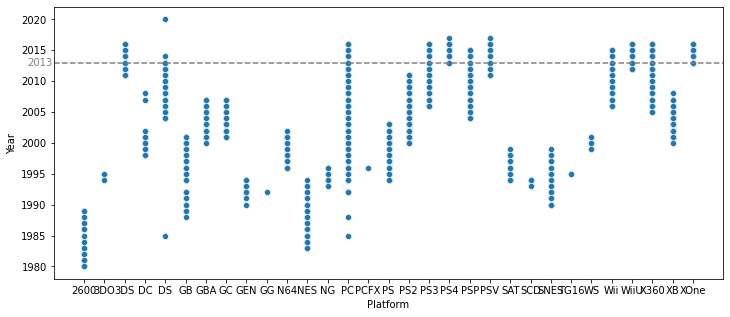

In [22]:
import seaborn as sns

plt.figure(figsize=(12,5))
plt.axhline(2013, color='gray', linestyle='--')
plt.text(-2.8, 2012.5, "2013", color='gray')
sns.scatterplot(df_sales['Platform'], df_sales['Year'])

- Platform은 인기가 한 번 식으면 다시 오르기 힘듦.
- 따라서, 대략 2013년 이후의 Platform만을 시각화함.

## 2.플랫폼 별 지역 별 판매량

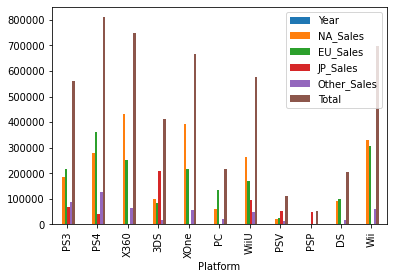

In [91]:
df_sales_recent = df_sales[df_sales.Year >= 2013]
df_sales_recent.groupby(['Platform'], observed=True).mean().plot.bar();

### NA(북미)
- 평균랭킹(XOne, WiiU, PS4, X360, Wii)
- 총 랭킹(PS4, XOne, X360, PS3, WiiU)

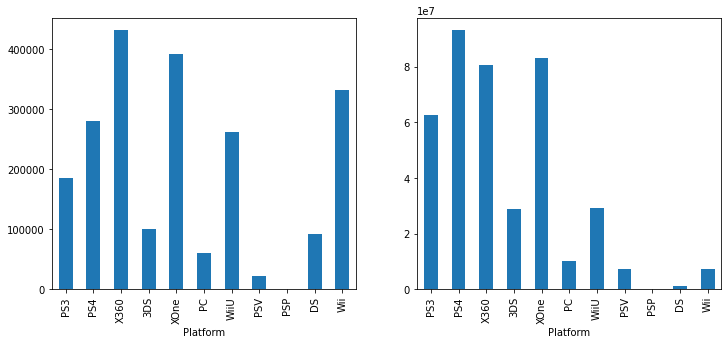

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['NA_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['NA_Sales'].sum().plot.bar();

### EU(유럽)
- 평균랭킹(PS4, Wii, XOne, WiiU, X360)
- 총 랭킹(PS4, XOne, PS3, X360, PC)

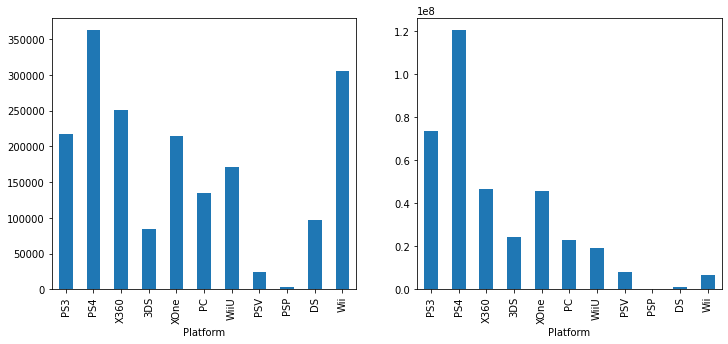

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['EU_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['EU_Sales'].sum().plot.bar();

### JP(일본)
- 평균랭킹(3DS, WiiU, PSV, PS3, PS4)
- 총 랭킹(3DS, PSV, PS4, PS3, WiiU)

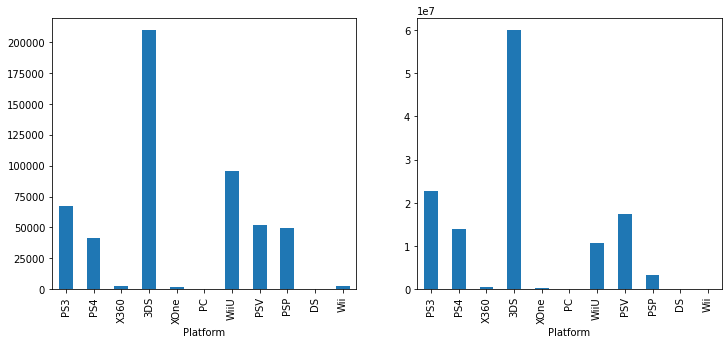

In [94]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['JP_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['JP_Sales'].sum().plot.bar();

### Other(나머지)
- 평균랭킹(PS4, XOne, WiiU, PS3, Wii)
- 총 랭킹(PS4, PS3, XOne, X360, WiiU)

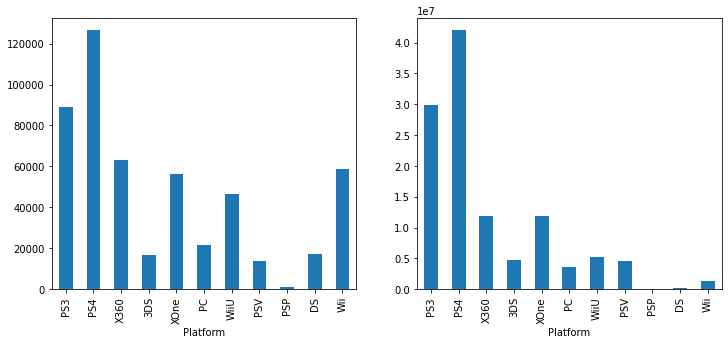

In [95]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['Other_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['Other_Sales'].sum().plot.bar();

### Total
- 평균랭킹(PS4, XOne, WiiU, Wii, X360)
- 총 랭킹(PS4, XOne, 3DS, PS3, X360)

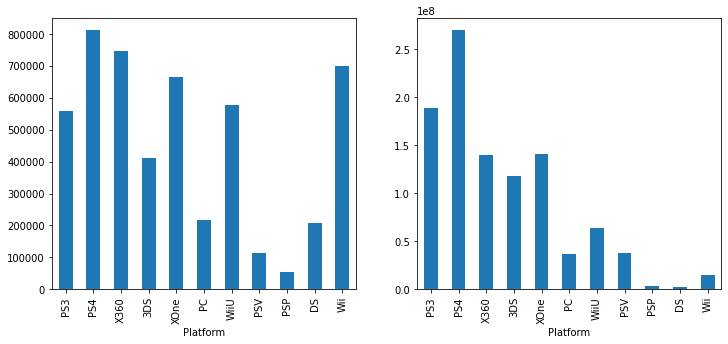

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['Total'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['Total'].sum().plot.bar();

### 총평
- 일본을 제외한 다른 나라의 Platform 취향이 비슷함.
- PS4, XOne, WiiU는 전 세계 3위권
- 일본에서는 특이하게 3DS와 PSV가 인기

In [97]:
bins = [1980, 2000, 2005, 2010, 2015, 2020]
labels = ['1900', '2000', '2005', '2010', '2015']

df_sales['Year_label'] = pd.cut(x=df_sales['Year'], bins=bins, labels=labels)

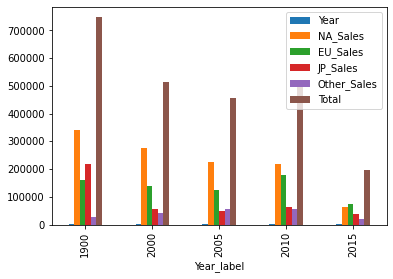

In [98]:
df_sales.groupby(['Year_label']).mean().plot.bar()

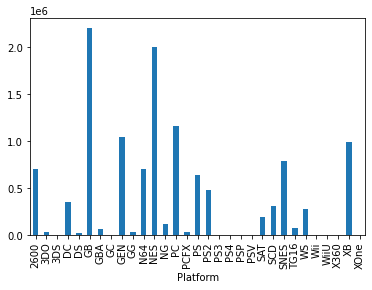

In [99]:
df_sales[df_sales['Year_label'] == '1900'].groupby(['Platform'])['Total'].mean().plot.bar()

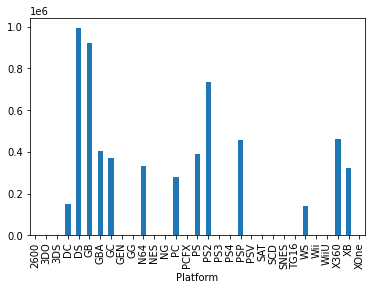

In [100]:
df_sales[df_sales['Year_label'] == '2000'].groupby(['Platform'])['Total'].mean().plot.bar()

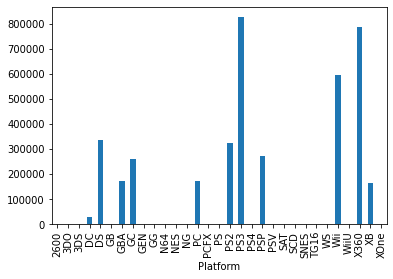

In [101]:
df_sales[df_sales['Year_label'] == '2005'].groupby(['Platform'])['Total'].mean().plot.bar()

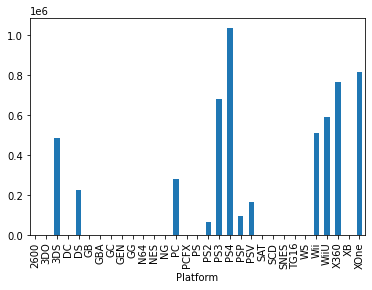

In [102]:
df_sales[df_sales['Year_label'] == '2010'].groupby(['Platform'])['Total'].mean().plot.bar()

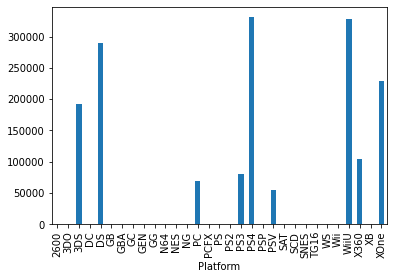

In [103]:
df_sales[df_sales['Year_label'] == '2015'].groupby(['Platform'])['Total'].mean().plot.bar()

## 3.장르 별 호황년도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


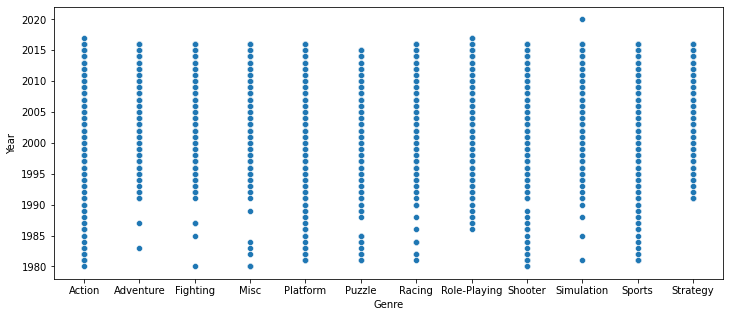

In [104]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_sales['Genre'], df_sales['Year'])
plt.show()

장르는 연도를 불문하고 모든 분야에 수요가 있음.

### 꺾은선 그래프

In [105]:
dfg = df_sales.groupby(["Year", "Genre"]).mean()

#### NA(북미)

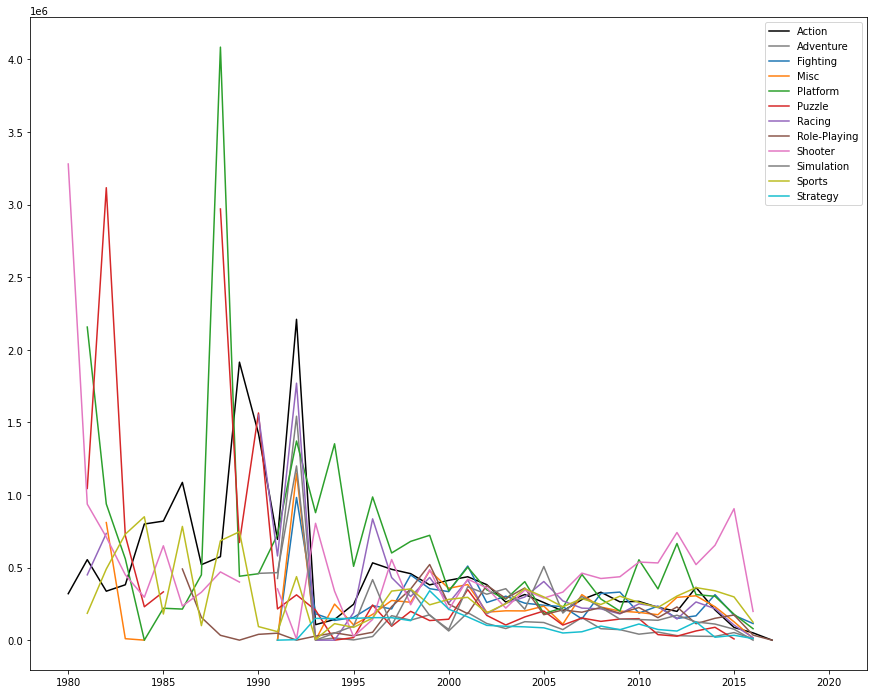

In [106]:
dfg_NA = dfg['NA_Sales']
dfg_NA = dfg_NA.unstack()

colors = ['black', 'gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.figure(figsize=(15,12))
for i in range(len(dfg_NA.columns)):
    plt.plot(dfg_NA.index, dfg_NA.iloc[:,i], label=dfg_NA.columns[i], color=colors[i])
plt.legend()
plt.show()

#### EU(유럽)

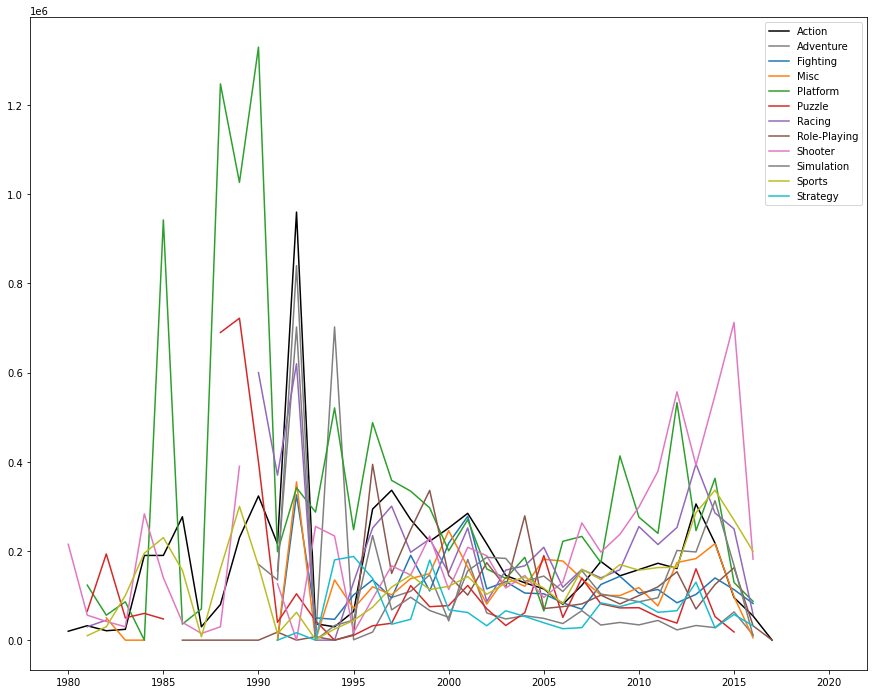

In [107]:
dfg_EU = dfg['EU_Sales']
dfg_EU = dfg_EU.unstack()

plt.figure(figsize=(15,12))
for i in range(len(dfg_EU.columns)):
    plt.plot(dfg_EU.index, dfg_EU.iloc[:,i], label=dfg_EU.columns[i], color=colors[i])
plt.legend()
plt.show()

#### JP(일본)

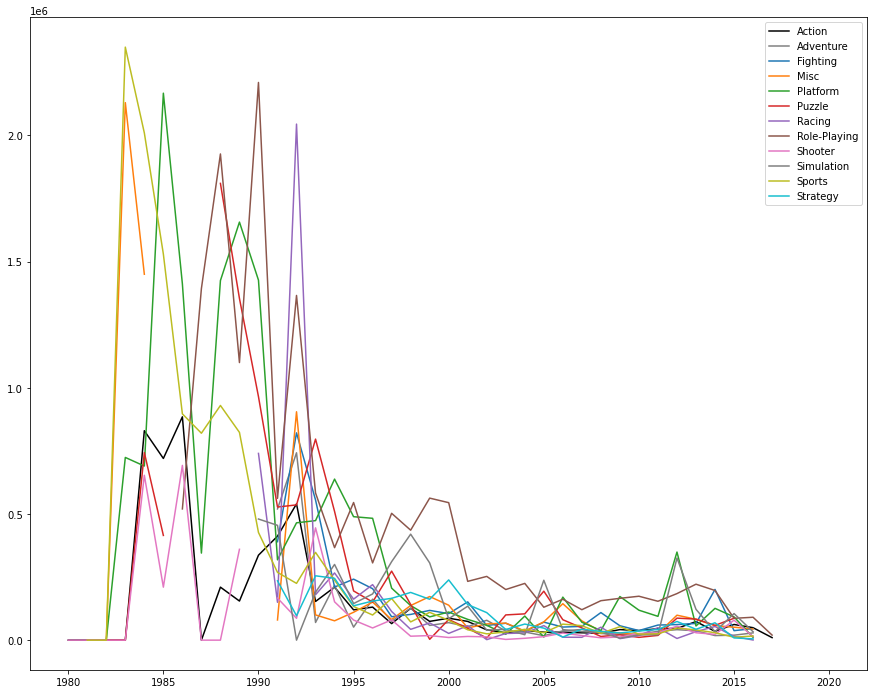

In [108]:
dfg_JP = dfg['JP_Sales']
dfg_JP = dfg_JP.unstack()

plt.figure(figsize=(15,12))
for i in range(len(dfg_JP.columns)):
    plt.plot(dfg_JP.index, dfg_JP.iloc[:,i], label=dfg_JP.columns[i], color=colors[i])
plt.legend()
plt.show()

#### Other(나머지)

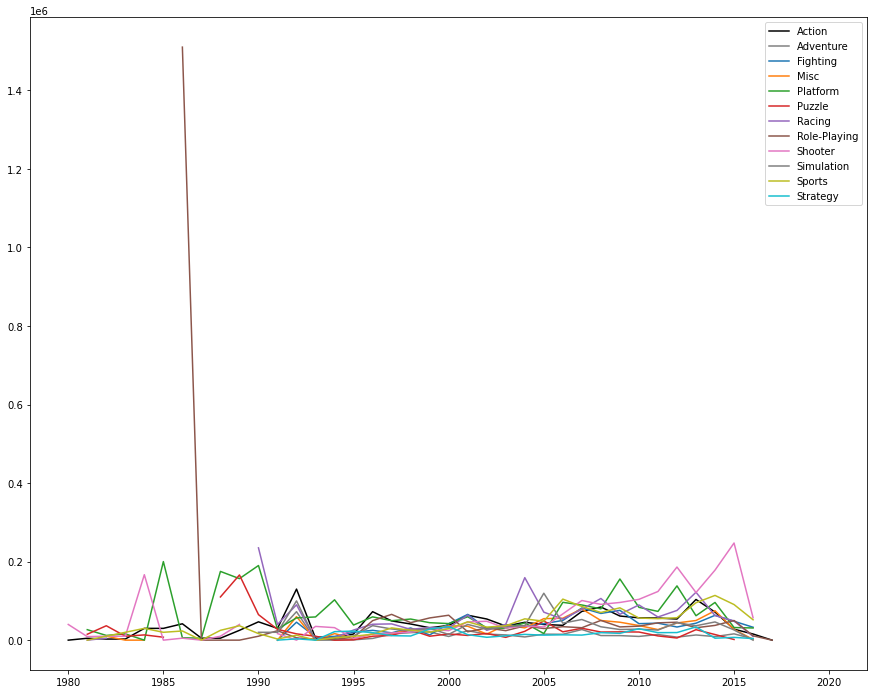

In [109]:
dfg_Other = dfg['Other_Sales']
dfg_Other = dfg_Other.unstack()

plt.figure(figsize=(15,12))
for i in range(len(dfg_Other.columns)):
    plt.plot(dfg_Other.index, dfg_Other.iloc[:,i], label=dfg_Other.columns[i], color=colors[i])
plt.legend()
plt.show()

#### Total

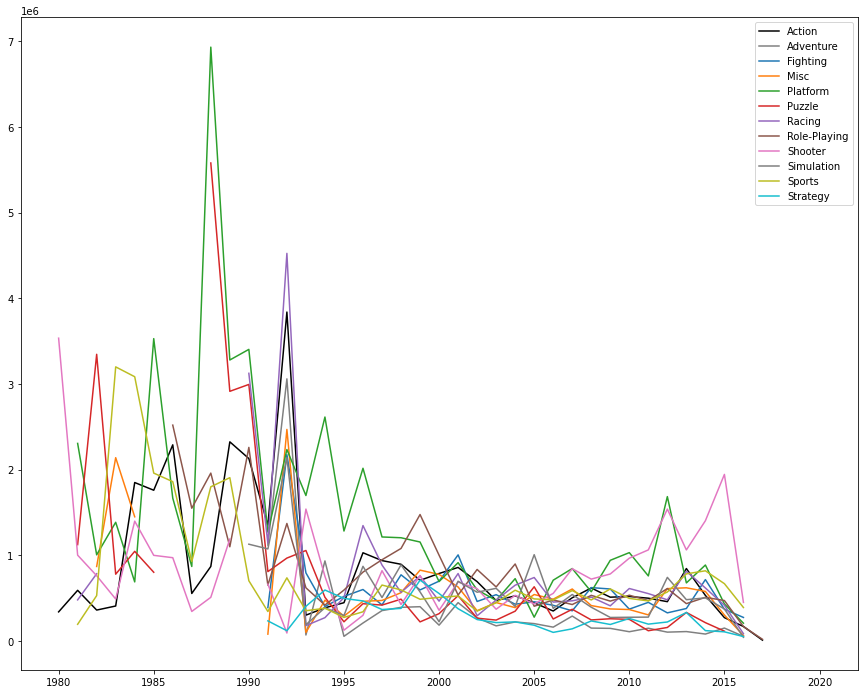

In [110]:
dfg_total = dfg['Total']
dfg_total = dfg_total.unstack()

plt.figure(figsize=(15,12))
for i in range(len(dfg_total.columns)):
    plt.plot(dfg_total.index, dfg_total.iloc[:,i], label=dfg_total.columns[i], color=colors[i])
plt.legend()
plt.show()

#### Genre 별 판매량

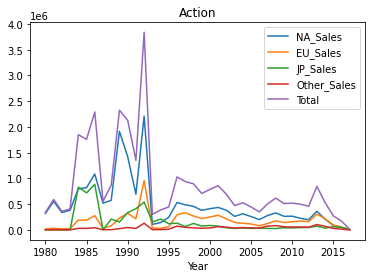

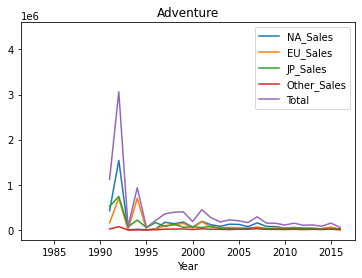

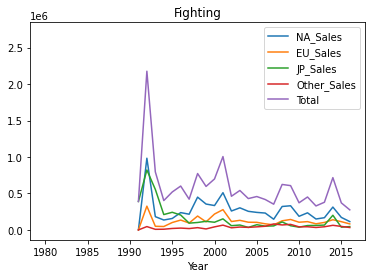

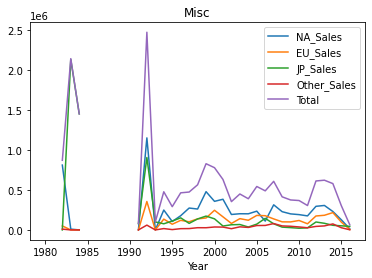

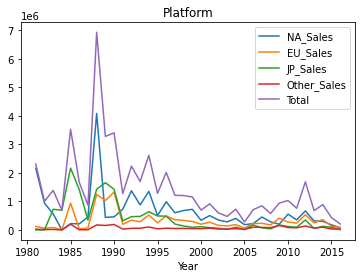

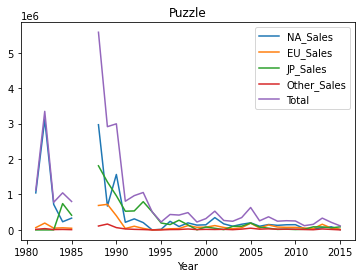

In [111]:
dfg = df_sales.groupby(["Genre", "Year"]).mean()

dfg.loc["Action"].plot()
plt.title("Action")
plt.show()

dfg.loc["Adventure"].plot()
plt.title("Adventure")
plt.show()

dfg.loc["Fighting"].plot()
plt.title("Fighting")
plt.show()

dfg.loc["Misc"].plot()
plt.title("Misc")
plt.show()

dfg.loc["Platform"].plot()
plt.title("Platform")
plt.show()

dfg.loc["Puzzle"].plot()
plt.title("Puzzle")
plt.show()

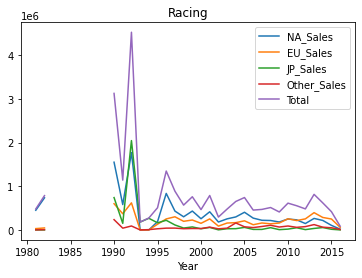

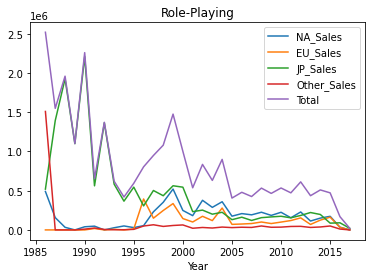

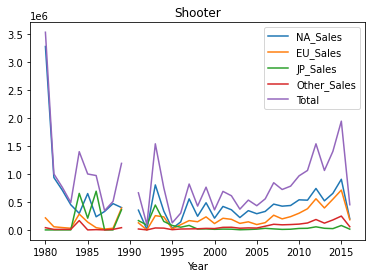

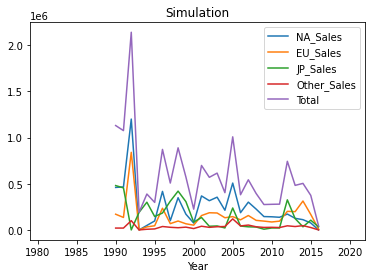

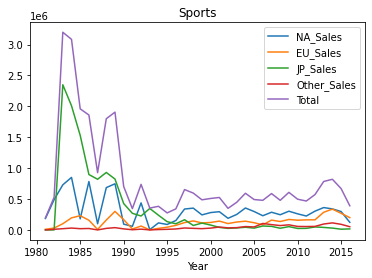

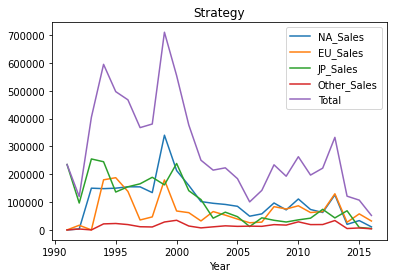

In [112]:
dfg.loc["Racing"].plot()
plt.title("Racing")
plt.show()

dfg.loc["Role-Playing"].plot()
plt.title("Role-Playing")
plt.show()

dfg.loc["Shooter"].plot()
plt.title("Shooter")
plt.show()

dfg.loc["Simulation"].plot()
plt.title("Simulation")
plt.show()

dfg.loc["Sports"].plot()
plt.title("Sports")
plt.show()

dfg.loc["Strategy"].plot()
plt.title("Strategy")
plt.show()

### 막대 그래프

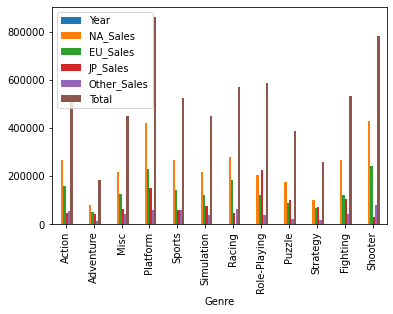

In [113]:
df_sales.groupby(['Genre'], observed=True).mean().plot.bar();

#### NA(북미)
1. 전체기간
    - 평균
        - Shooter, Platform
        - Racing, Sports, Fighting, Action
        - Misc, Simulation, Role-Playing, Puzzle
    - 총
        - Action
        - Sports, Shooter
        - Misc, Platform, Racing, Role-Playing
2. 최근
    - 평균
        - Shooter
        - Sports, Fighting, Platform
        - Misc, Role-Playing, Racing, Action
    - 총
        - Shooter, Action
        - Sports
        - Role-Playing

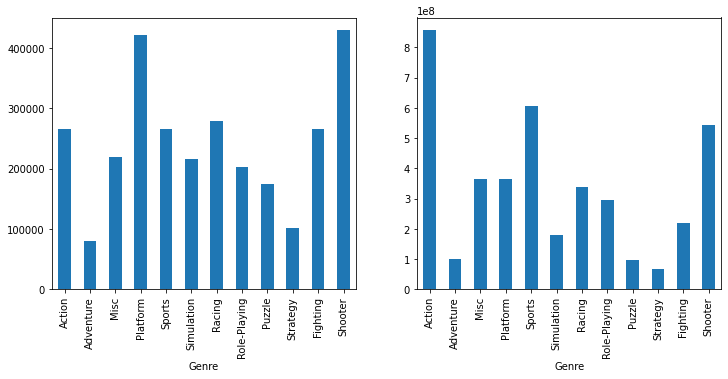

In [114]:
# 전체기간
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales.groupby(['Genre'], observed=True)['NA_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales.groupby(['Genre'], observed=True)['NA_Sales'].sum().plot.bar();

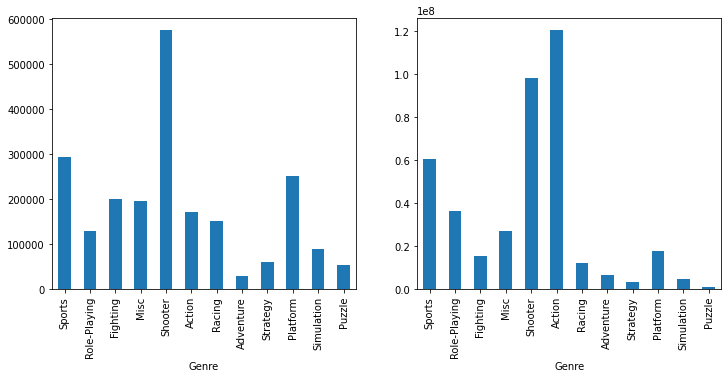

In [115]:
# 최근
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Genre'], observed=True)['NA_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Genre'], observed=True)['NA_Sales'].sum().plot.bar();

#### EU(유럽)
1. 전체기간
    - 평균
        - Shooter, Platform
        - Racing, Action, Sports
        - Misc, Simulation, Role-Playing, Fighting
    - 총
        - Action
        - Sports, Shooter
        - Racing, Misc, Platform, Role-Playing
2. 최근
    - 평균
        - Shooter
        - Sports, Action, Platform, Simulation
        - Misc, Action, Fighting, Role-Playing
    - 총
        - Action
        - Shooter
        - Sports
        - Role-Playing

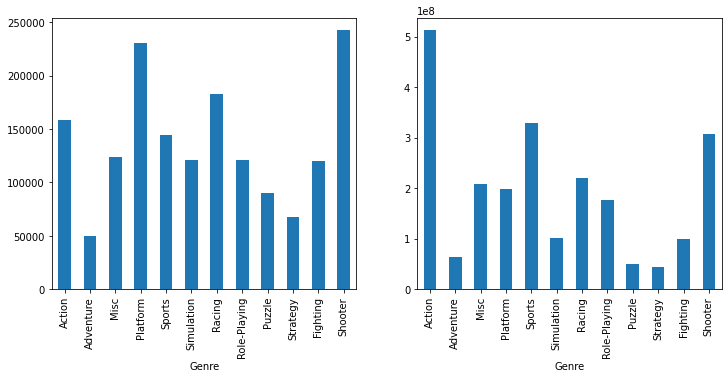

In [116]:
# 전체기간
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales.groupby(['Genre'], observed=True)['EU_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales.groupby(['Genre'], observed=True)['EU_Sales'].sum().plot.bar();

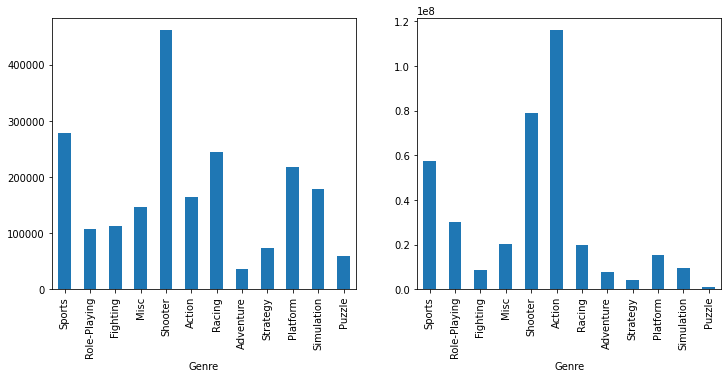

In [117]:
# 최근
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Genre'], observed=True)['EU_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Genre'], observed=True)['EU_Sales'].sum().plot.bar();

#### JP(일본)
1. 전체기간
    - 평균
        - Role-Playing
        - Platform
        - Fighting, Puzzle
        - Simulation, Strategy
    - 총
        - Role-Playing
        - Action, Sports, Platform
        - Misc, Fighting
2. 최근
    - 평균
        - Role-Playing
        - Fighting
        - Platform, Puzzle, Simulation
    - 총
        - Role-Playing, Action

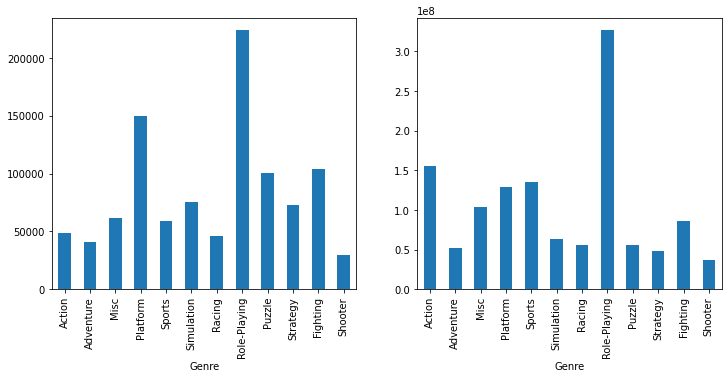

In [118]:
# 전체기간
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales.groupby(['Genre'], observed=True)['JP_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales.groupby(['Genre'], observed=True)['JP_Sales'].sum().plot.bar();

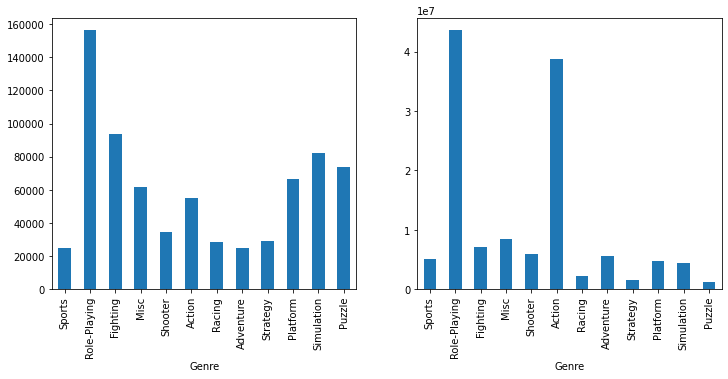

In [119]:
# 최근
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Genre'], observed=True)['JP_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Genre'], observed=True)['JP_Sales'].sum().plot.bar();

#### Other(나머지)
1. 전체
    - 평균
        - Shooter
        - Racing, Platform, Sports, Action
        - Misc, Fighting, Role-Playing, Simulation
    - 총
        - Action
        - Sports
        - Shooter
        - Racing, Misc, Role-Playing, Platform
2. 최근
    - 평균
        - Shooter
        - Sports
        - Platform, Fighting, Racing, Misc, Action, Role-Playing
    - 총
        - Action
        - Shooter
        - Sports
        - Role-Playing

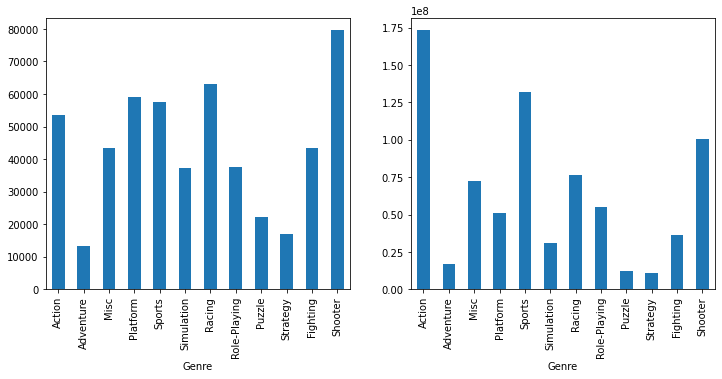

In [120]:
# 전체기간
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales.groupby(['Genre'], observed=True)['Other_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales.groupby(['Genre'], observed=True)['Other_Sales'].sum().plot.bar();

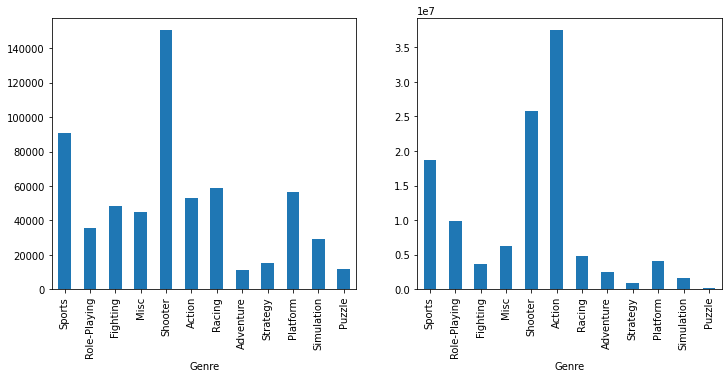

In [121]:
# 최근
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Genre'], observed=True)['Other_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Genre'], observed=True)['Other_Sales'].sum().plot.bar();

#### Total
1. 전체기간
    - 평균
        - Platform
        - Shooter
        - Role-Playing, Racing, Sports, Fighting, Action
    - 총
        - Action
        - Sports, Shooter
        - Role-Playing, Misc, Platform, Racing
2. 최근
    - 평균
        - Shooter
        - Sports
        - Platform, Fighting
    - 총
        - Action
        - Shooter
        - Sports, Role-Playing

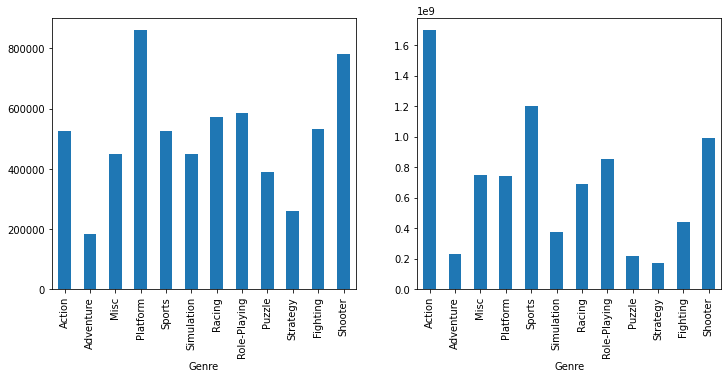

In [122]:
# 전체기간
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales.groupby(['Genre'], observed=True)['Total'].mean().plot.bar();
plt.subplot(122)
df_sales.groupby(['Genre'], observed=True)['Total'].sum().plot.bar();

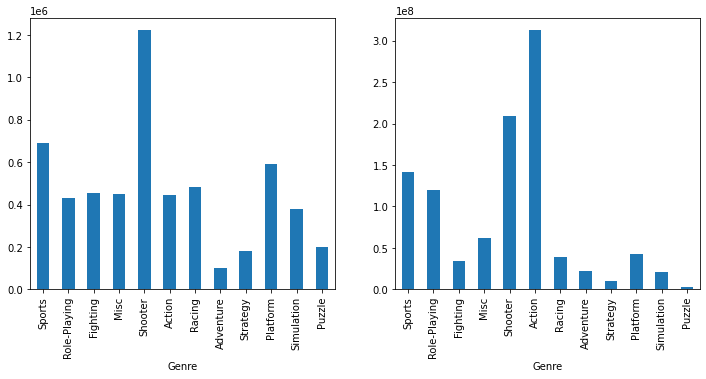

In [123]:
# 최근
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Genre'], observed=True)['Total'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Genre'], observed=True)['Total'].sum().plot.bar();

### 년도 & 장르 상관관계

In [124]:
df_sales.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales   Total  \
0           Destineer     40000         0         0            0   40000   
1  Namco Bandai Games    170000         0         0        10000  180000   
2           Alchemist         0         0     20000            0   20000   
3           Zoo Games     40000         0         0            0   40000   
4         D3Publisher    120000     90000         0        40000  250000   

  Year_label  
0       2005  
1       2005  
2       2005  
3       2005  
4       2005

#### 북미(NA)

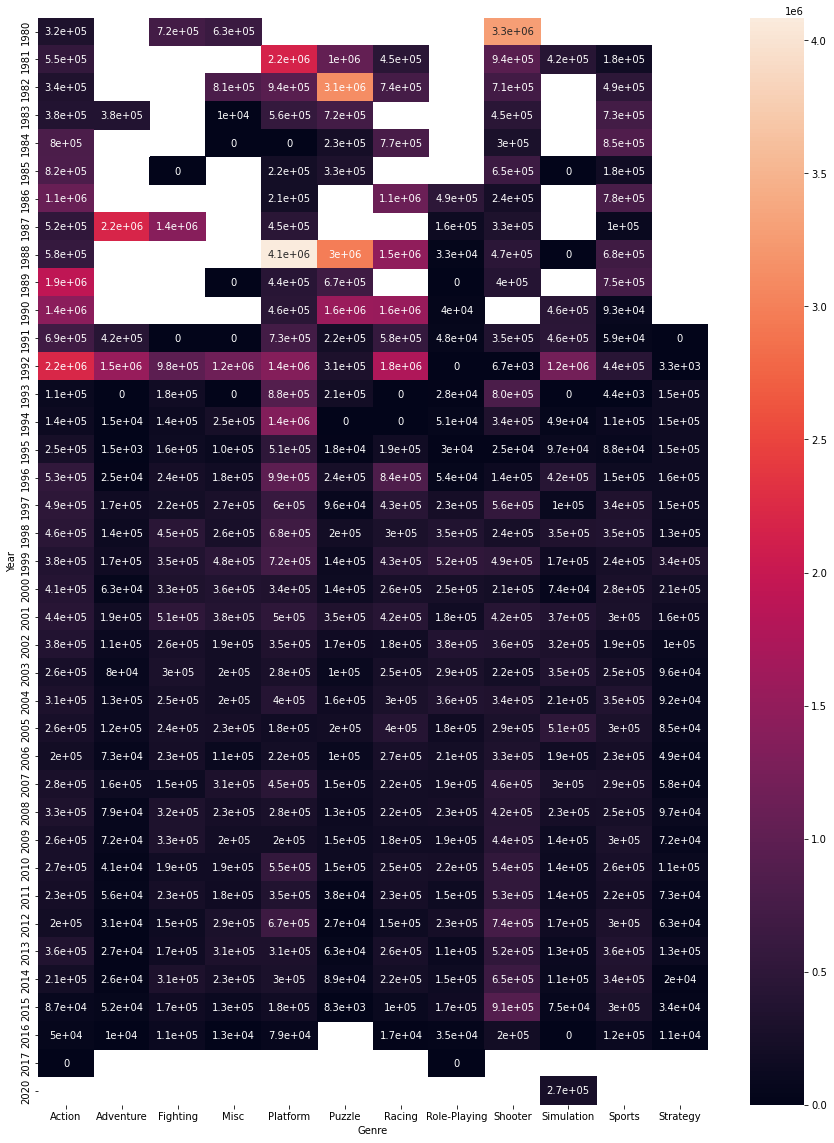

In [125]:
df_gen_NA = df_sales.groupby(['Year', 'Genre'])['NA_Sales'].mean()
df_gen_NA = df_gen_NA.unstack()

plt.figure(figsize=(15,20))
sns.heatmap(df_gen_NA, annot=True)
plt.show()

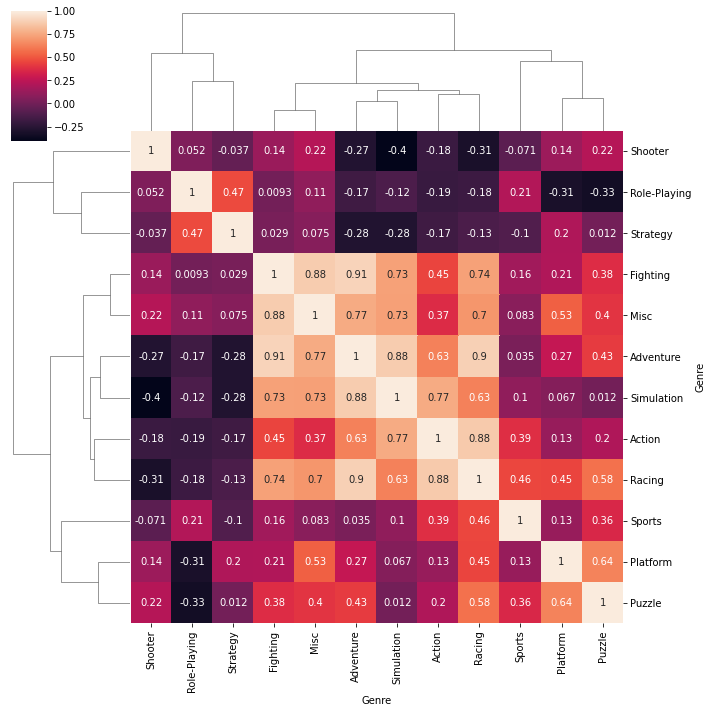

In [126]:
# 장르 별 상관관계
cor_df_gen_NA = df_gen_NA.corr()
sns.clustermap(cor_df_gen_NA, annot=True)

#### 유럽(EU)

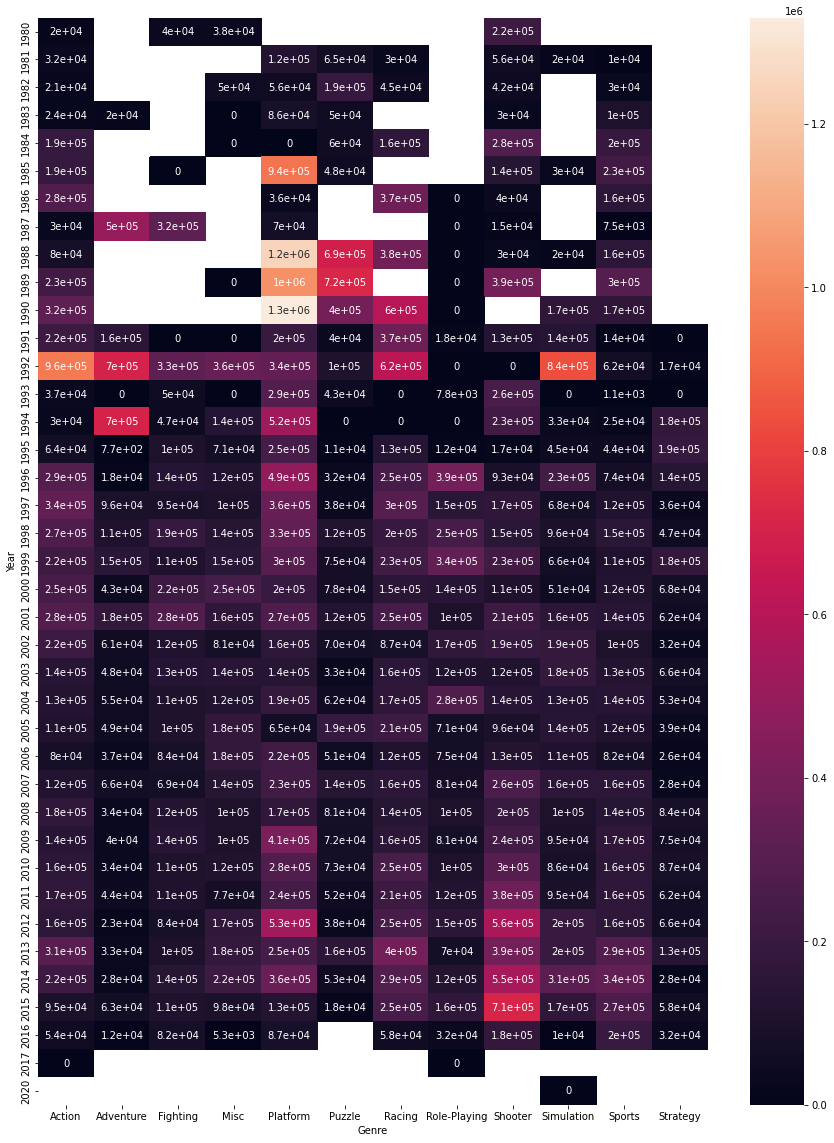

In [127]:
df_gen_EU = df_sales.groupby(['Year', 'Genre'])['EU_Sales'].mean()
df_gen_EU = df_gen_EU.unstack()

plt.figure(figsize=(15,20))
sns.heatmap(df_gen_EU, annot=True)
plt.show()

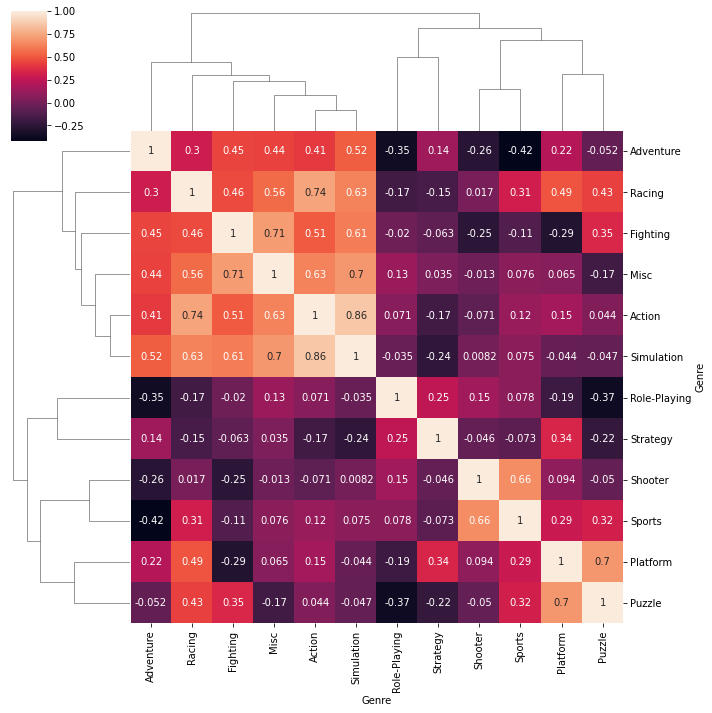

In [128]:
# 장르 별 상관관계
cor_df_gen_EU = df_gen_EU.corr()
sns.clustermap(cor_df_gen_EU, annot=True)

#### JP(일본)

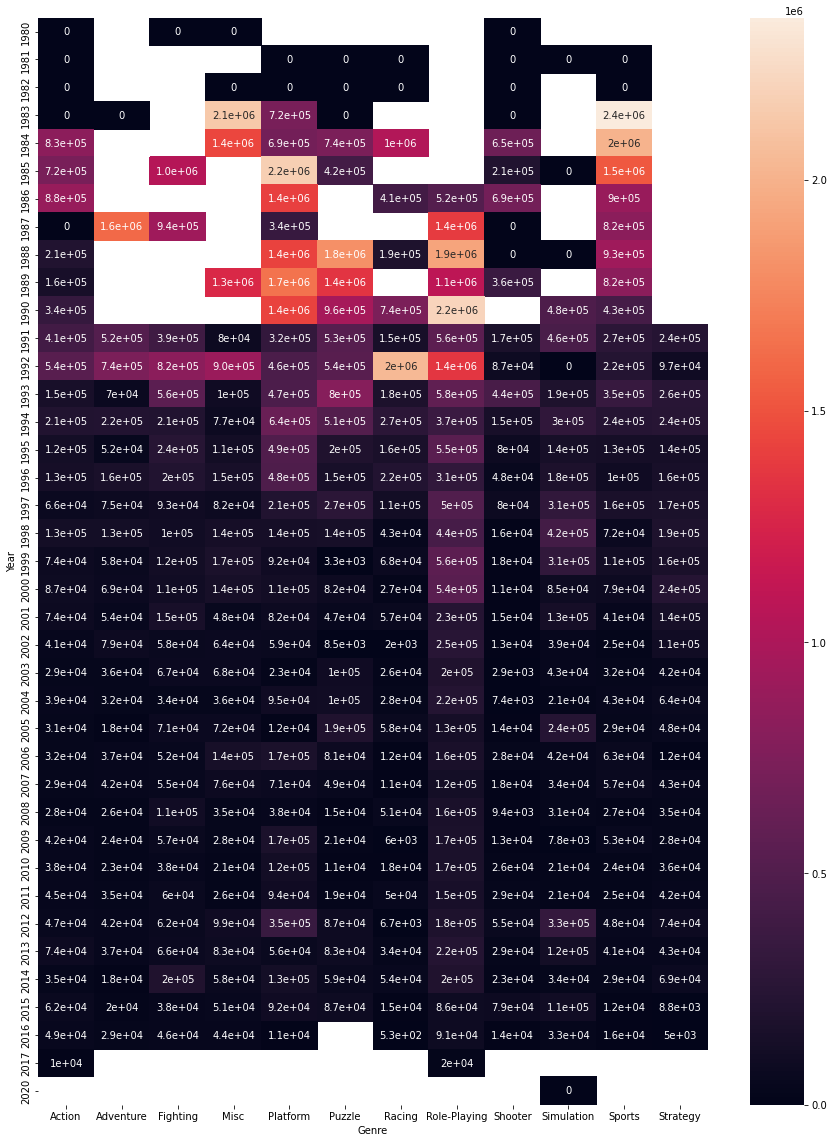

In [129]:
df_gen_JP = df_sales.groupby(['Year', 'Genre'])['JP_Sales'].mean()
df_gen_JP = df_gen_JP.unstack()

plt.figure(figsize=(15,20))
sns.heatmap(df_gen_JP, annot=True)
plt.show()

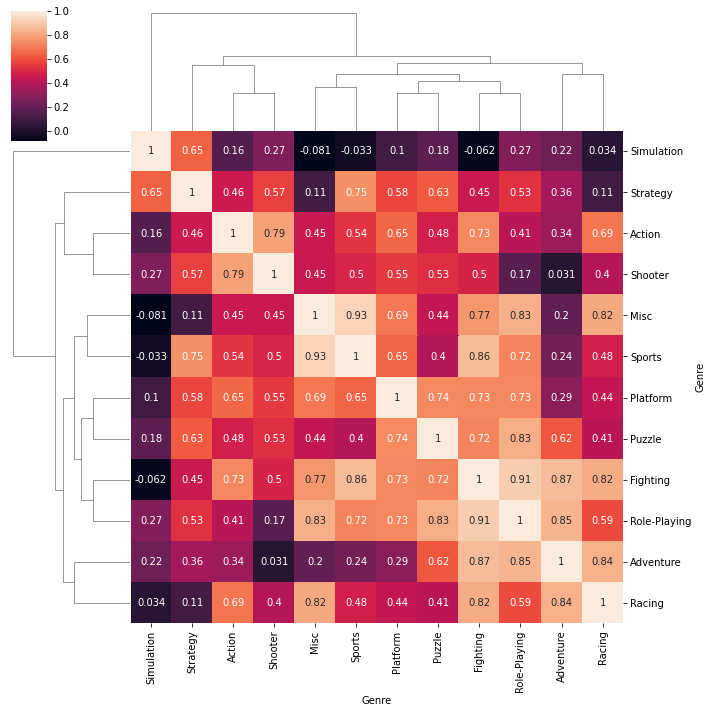

In [130]:
# 장르 별 상관관계
cor_df_gen_JP = df_gen_JP.corr()
sns.clustermap(cor_df_gen_JP, annot=True)

#### Other(나머지)

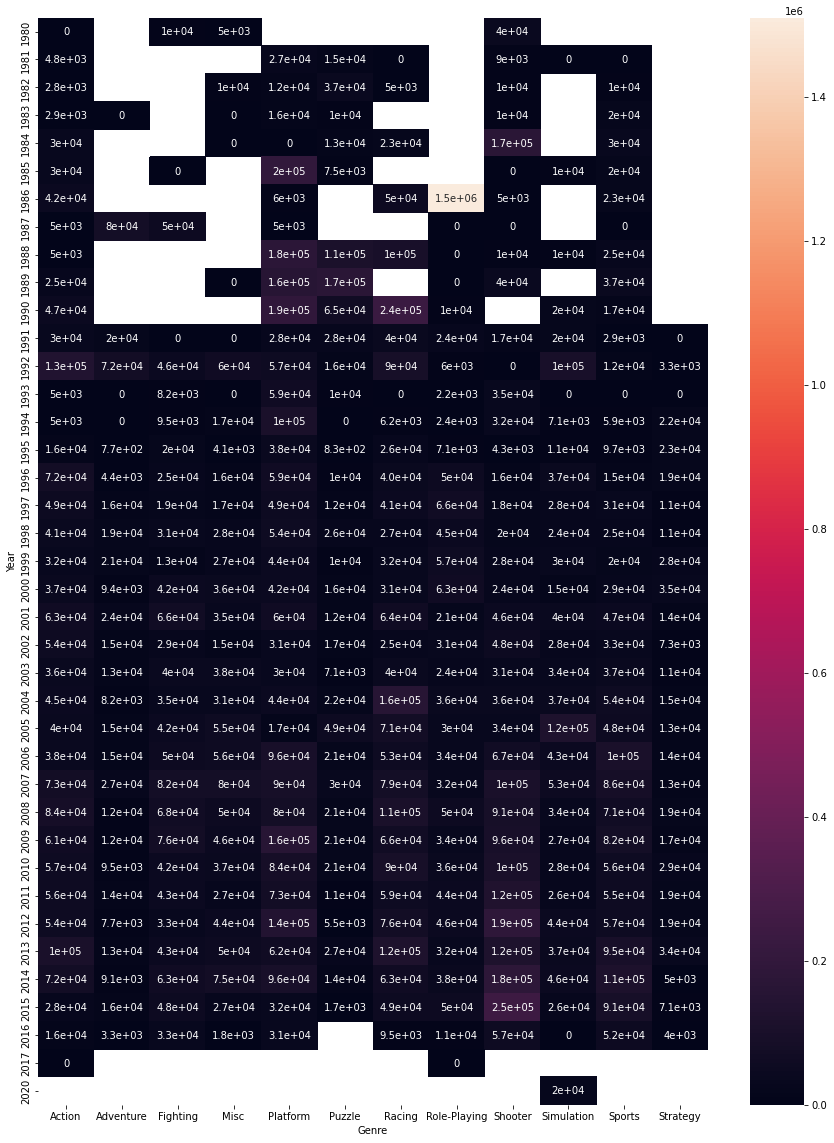

In [131]:
df_gen_Other = df_sales.groupby(['Year', 'Genre'])['Other_Sales'].mean()
df_gen_Other = df_gen_Other.unstack()

plt.figure(figsize=(15,20))
sns.heatmap(df_gen_Other, annot=True)
plt.show()

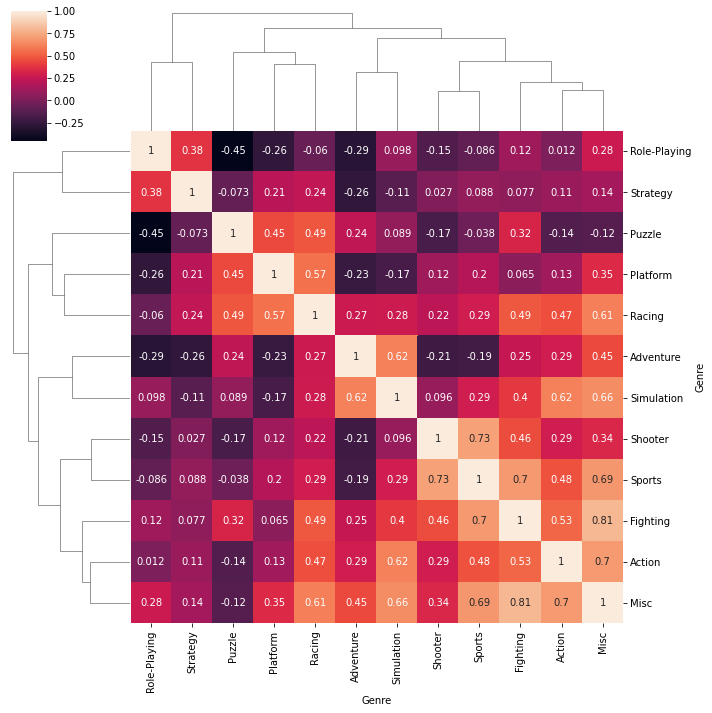

In [132]:
# 장르 별 상관관계
cor_df_gen_Other = df_gen_Other.corr()
sns.clustermap(cor_df_gen_Other, annot=True)

#### Total

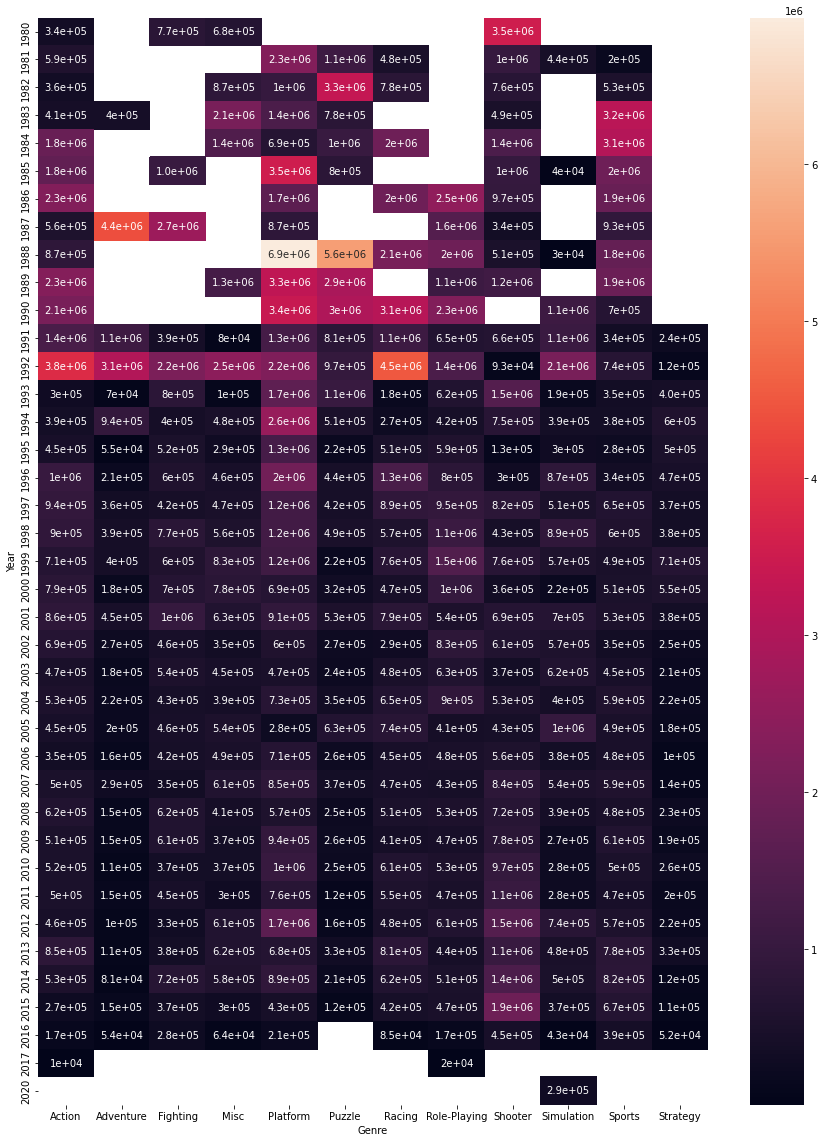

In [133]:
df_gen_tot = df_sales.groupby(['Year', 'Genre'])['Total'].mean()
df_gen_tot = df_gen_tot.unstack()

plt.figure(figsize=(15,20))
sns.heatmap(df_gen_tot, annot=True)
plt.show()

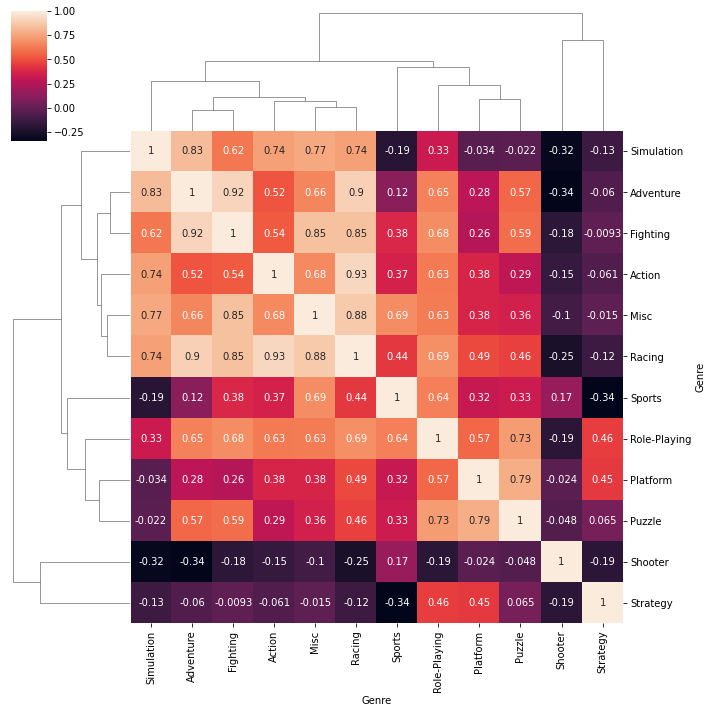

In [134]:
# 장르 별 상관관계
cor_df_gen_tot = df_gen_tot.corr()
sns.clustermap(cor_df_gen_tot, annot=True)

## 5.제작사 별 호황년도

In [135]:
df_sales.Publisher.value_counts().head(12)

Electronic Arts                 1328
Activision                       960
Ubisoft                          910
Namco Bandai Games               910
Konami Digital Entertainment     817
THQ                              708
Nintendo                         690
Sony Computer Entertainment      674
Sega                             628
Take-Two Interactive             408
Capcom                           373
Atari                            345
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'Atari')

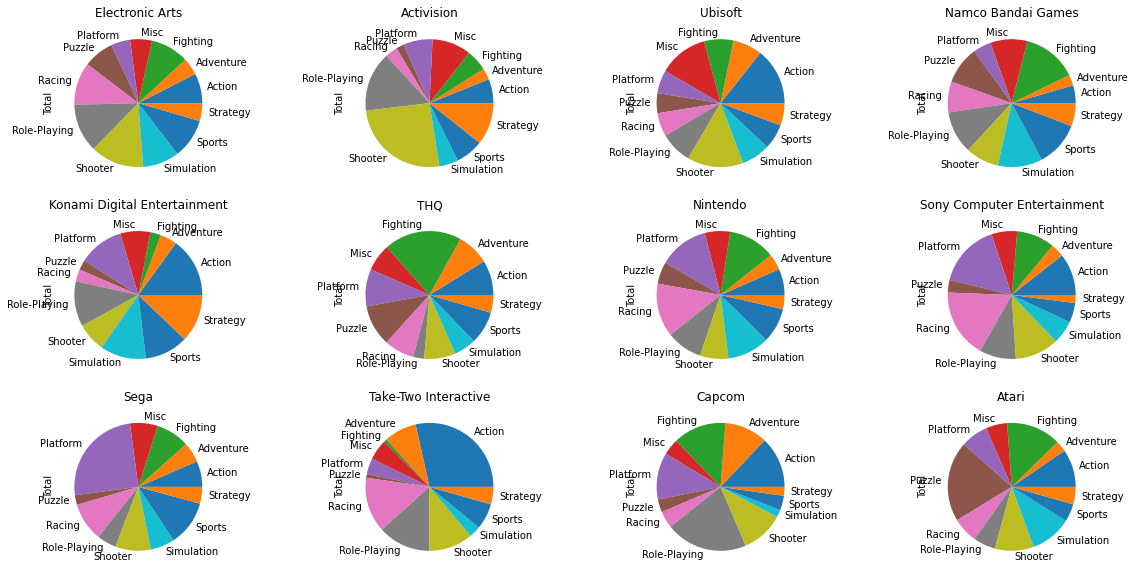

In [136]:
df_pub = df_sales.groupby(['Publisher', 'Genre']).mean()

plt.figure(figsize=(20,10))
plt.subplot(341)
df_pub.loc['Electronic Arts']['Total'].plot.pie()
plt.title('Electronic Arts')

plt.subplot(342)
df_pub.loc['Activision']['Total'].plot.pie()
plt.title('Activision')

plt.subplot(343)
df_pub.loc['Ubisoft']['Total'].plot.pie()
plt.title('Ubisoft')

plt.subplot(344)
df_pub.loc['Namco Bandai Games']['Total'].plot.pie()
plt.title('Namco Bandai Games')

plt.subplot(345)
df_pub.loc['Konami Digital Entertainment']['Total'].plot.pie()
plt.title('Konami Digital Entertainment')

plt.subplot(346)
df_pub.loc['THQ']['Total'].plot.pie()
plt.title('THQ')

plt.subplot(347)
df_pub.loc['Nintendo']['Total'].plot.pie()
plt.title('Nintendo')

plt.subplot(348)
df_pub.loc['Sony Computer Entertainment']['Total'].plot.pie()
plt.title('Sony Computer Entertainment')

plt.subplot(349)
df_pub.loc['Sega']['Total'].plot.pie()
plt.title('Sega')

plt.subplot(3,4,10)
df_pub.loc['Take-Two Interactive']['Total'].plot.pie()
plt.title('Take-Two Interactive')

plt.subplot(3,4,11)
df_pub.loc['Capcom']['Total'].plot.pie()
plt.title('Capcom')

plt.subplot(3,4,12)
df_pub.loc['Atari']['Total'].plot.pie()
plt.title('Atari')

IndexError: ignored

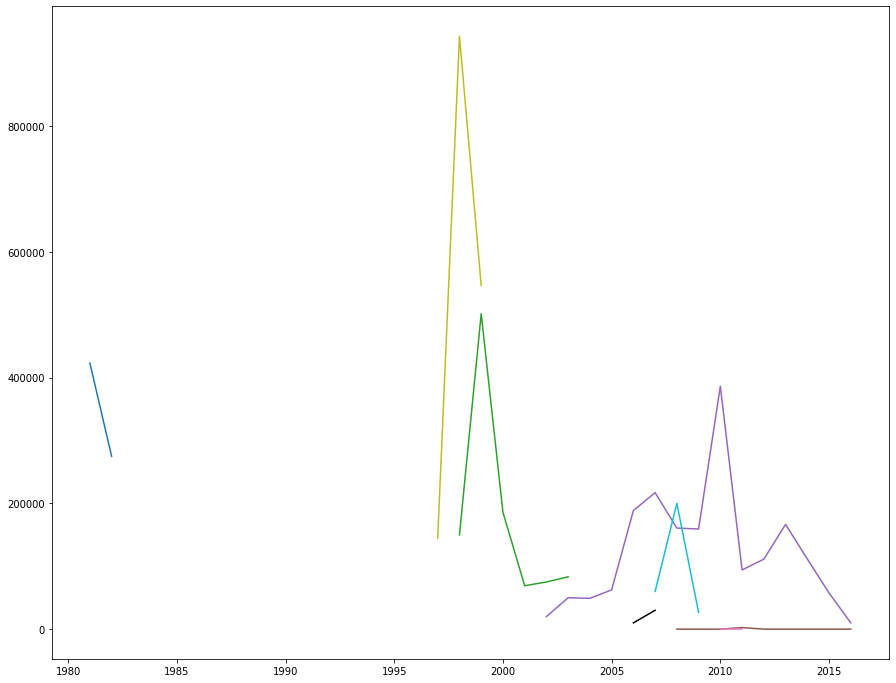

In [137]:
df_yp = df_sales.groupby(['Year', 'Publisher']).mean()

dfyp_NA = df_yp['NA_Sales']
dfyp_NA = df_yp.unstack()

colors = ['black', 'gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.figure(figsize=(15,12))
for i in range(len(dfyp_NA.columns)):
    plt.plot(dfyp_NA.index, dfyp_NA.iloc[:,i], label=dfyp_NA.columns[i], color=colors[i])
plt.legend()
plt.show()

In [ ]:
df_pub = df_sales.groupby(['Publisher', 'Genre']).mean()

plt.figure(figsize=(20,10))
plt.subplot(341)
df_pub.loc['Electronic Arts']['NA_Sales'].plot.pie()
plt.title('Electronic Arts')

plt.subplot(342)
df_pub.loc['Activision']['NA_Sales'].plot.pie()
plt.title('Activision')

plt.subplot(343)
df_pub.loc['Ubisoft']['NA_Sales'].plot.pie()
plt.title('Ubisoft')

plt.subplot(344)
df_pub.loc['Namco Bandai Games']['NA_Sales'].plot.pie()
plt.title('Namco Bandai Games')

plt.subplot(345)
df_pub.loc['Konami Digital Entertainment']['NA_Sales'].plot.pie()
plt.title('Konami Digital Entertainment')

plt.subplot(346)
df_pub.loc['THQ']['NA_Sales'].plot.pie()
plt.title('THQ')

plt.subplot(347)
df_pub.loc['Nintendo']['NA_Sales'].plot.pie()
plt.title('Nintendo')

plt.subplot(348)
df_pub.loc['Sony Computer Entertainment']['NA_Sales'].plot.pie()
plt.title('Sony Computer Entertainment')

plt.subplot(349)
df_pub.loc['Sega']['NA_Sales'].plot.pie()
plt.title('Sega')

plt.subplot(3,4,10)
df_pub.loc['Take-Two Interactive']['NA_Sales'].plot.pie()
plt.title('Take-Two Interactive')

plt.subplot(3,4,11)
df_pub.loc['Capcom']['NA_Sales'].plot.pie()
plt.title('Capcom')

plt.subplot(3,4,12)
df_pub.loc['Atari']['NA_Sales'].plot.pie()
plt.title('Atari')

In [ ]:
df_pub = df_sales.groupby(['Publisher', 'Genre']).mean()

plt.figure(figsize=(20,10))
plt.subplot(341)
df_pub.loc['Electronic Arts']['EU_Sales'].plot.pie()
plt.title('Electronic Arts')

plt.subplot(342)
df_pub.loc['Activision']['EU_Sales'].plot.pie()
plt.title('Activision')

plt.subplot(343)
df_pub.loc['Ubisoft']['EU_Sales'].plot.pie()
plt.title('Ubisoft')

plt.subplot(344)
df_pub.loc['Namco Bandai Games']['EU_Sales'].plot.pie()
plt.title('Namco Bandai Games')

plt.subplot(345)
df_pub.loc['Konami Digital Entertainment']['EU_Sales'].plot.pie()
plt.title('Konami Digital Entertainment')

plt.subplot(346)
df_pub.loc['THQ']['EU_Sales'].plot.pie()
plt.title('THQ')

plt.subplot(347)
df_pub.loc['Nintendo']['EU_Sales'].plot.pie()
plt.title('Nintendo')

plt.subplot(348)
df_pub.loc['Sony Computer Entertainment']['EU_Sales'].plot.pie()
plt.title('Sony Computer Entertainment')

plt.subplot(349)
df_pub.loc['Sega']['EU_Sales'].plot.pie()
plt.title('Sega')

plt.subplot(3,4,10)
df_pub.loc['Take-Two Interactive']['EU_Sales'].plot.pie()
plt.title('Take-Two Interactive')

plt.subplot(3,4,11)
df_pub.loc['Capcom']['EU_Sales'].plot.pie()
plt.title('Capcom')

plt.subplot(3,4,12)
df_pub.loc['Atari']['EU_Sales'].plot.pie()
plt.title('Atari')

In [ ]:
df_pub = df_sales.groupby(['Publisher', 'Genre']).mean()

plt.figure(figsize=(20,10))
plt.subplot(341)
df_pub.loc['Electronic Arts']['JP_Sales'].plot.pie()
plt.title('Electronic Arts')

plt.subplot(342)
df_pub.loc['Activision']['JP_Sales'].plot.pie()
plt.title('Activision')

plt.subplot(343)
df_pub.loc['Ubisoft']['JP_Sales'].plot.pie()
plt.title('Ubisoft')

plt.subplot(344)
df_pub.loc['Namco Bandai Games']['JP_Sales'].plot.pie()
plt.title('Namco Bandai Games')

plt.subplot(345)
df_pub.loc['Konami Digital Entertainment']['JP_Sales'].plot.pie()
plt.title('Konami Digital Entertainment')

plt.subplot(346)
df_pub.loc['THQ']['JP_Sales'].plot.pie()
plt.title('THQ')

plt.subplot(347)
df_pub.loc['Nintendo']['JP_Sales'].plot.pie()
plt.title('Nintendo')

plt.subplot(348)
df_pub.loc['Sony Computer Entertainment']['JP_Sales'].plot.pie()
plt.title('Sony Computer Entertainment')

plt.subplot(349)
df_pub.loc['Sega']['JP_Sales'].plot.pie()
plt.title('Sega')

plt.subplot(3,4,10)
df_pub.loc['Take-Two Interactive']['JP_Sales'].plot.pie()
plt.title('Take-Two Interactive')

plt.subplot(3,4,11)
df_pub.loc['Capcom']['JP_Sales'].plot.pie()
plt.title('Capcom')

plt.subplot(3,4,12)
df_pub.loc['Atari']['JP_Sales'].plot.pie()
plt.title('Atari')

In [ ]:
df_pub = df_sales.groupby(['Publisher', 'Genre']).mean()

plt.figure(figsize=(20,10))
plt.subplot(341)
df_pub.loc['Electronic Arts']['Other_Sales'].plot.pie()
plt.title('Electronic Arts')

plt.subplot(342)
df_pub.loc['Activision']['Other_Sales'].plot.pie()
plt.title('Activision')

plt.subplot(343)
df_pub.loc['Ubisoft']['Other_Sales'].plot.pie()
plt.title('Ubisoft')

plt.subplot(344)
df_pub.loc['Namco Bandai Games']['Other_Sales'].plot.pie()
plt.title('Namco Bandai Games')

plt.subplot(345)
df_pub.loc['Konami Digital Entertainment']['Other_Sales'].plot.pie()
plt.title('Konami Digital Entertainment')

plt.subplot(346)
df_pub.loc['THQ']['Other_Sales'].plot.pie()
plt.title('THQ')

plt.subplot(347)
df_pub.loc['Nintendo']['Other_Sales'].plot.pie()
plt.title('Nintendo')

plt.subplot(348)
df_pub.loc['Sony Computer Entertainment']['Other_Sales'].plot.pie()
plt.title('Sony Computer Entertainment')

plt.subplot(349)
df_pub.loc['Sega']['Other_Sales'].plot.pie()
plt.title('Sega')

plt.subplot(3,4,10)
df_pub.loc['Take-Two Interactive']['Other_Sales'].plot.pie()
plt.title('Take-Two Interactive')

plt.subplot(3,4,11)
df_pub.loc['Capcom']['Other_Sales'].plot.pie()
plt.title('Capcom')

plt.subplot(3,4,12)
df_pub.loc['Atari']['Other_Sales'].plot.pie()
plt.title('Atari')

## 6.제작사 별, 지역 별 판매량

## 7.출고량이 높은 게임 분석

In [138]:
df_sales.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales   Total  \
0           Destineer     40000         0         0            0   40000   
1  Namco Bandai Games    170000         0         0        10000  180000   
2           Alchemist         0         0     20000            0   20000   
3           Zoo Games     40000         0         0            0   40000   
4         D3Publisher    120000     90000         0        40000  250000   

  Year_label  
0       2005  
1       2005  
2       2005  
3       2005  
4       2005

In [139]:
df_sales.loc[:, ['Name', 'Total']].max()

Name     ¡Shin Chan Flipa en colores!
Total                        23430000
dtype: object

In [140]:
df_sales[df_sales.Total == 23430000]

Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
10370  Mario Kart DS       DS  2005  Racing  Nintendo   9810000   7570000   

       JP_Sales  Other_Sales     Total Year_label  
10370   4130000      1920000  23430000       2000

In [143]:
df_sales.nlargest(20, ['Total'])

Name Platform  Year  \
10370                                 Mario Kart DS       DS  2005   
9171                    Pokemon Gold/Pokemon Silver       GB  1999   
3347                                        Wii Fit      Wii  2007   
10611                                  Wii Fit Plus      Wii  2009   
3394                             Grand Theft Auto V      PS3  2013   
12869  Brain Age: Train Your Brain in Minutes a Day       DS  2005   
6756                          New Super Mario Bros.       DS  2006   
10278                 Pokemon Diamond/Pokemon Pearl       DS  2006   
14454                           Super Mario Bros. 3      NES  1988   
10625                            Grand Theft Auto V     X360  2013   
5192                    Grand Theft Auto: Vice City      PS2  2002   
10628                 Pokemon Ruby/Pokemon Sapphire      GBA  2002   
499     Brain Age 2: More Training in Minutes a Day       DS  2005   
2942                                       Wii Play      Wii  2006   
986                          Gran Turismo 3: A-Spec      PS2  2001   
2741                 Call of Duty: Modern Warfare 3     X360  2011   
6080                        Call of Duty: Black Ops     X360  2010   
8312        Pokémon Yellow: Special Pikachu Edition       GB  1998   
8834                      Call of Duty: Black Ops 3      PS4  2015   
4127                     Call of Duty: Black Ops II      PS3  2012   

              Genre                    Publisher  NA_Sales  EU_Sales  \
10370        Racing                     Nintendo   9810000   7570000   
9171   Role-Playing                     Nintendo   9000000   6180000   
3347         Sports                     Nintendo   8940000   8029999   
10611        Sports                     Nintendo   9090000   8590000   
3394         Action         Take-Two Interactive   7010000   9270000   
12869          Misc                     Nintendo   4750000   9260000   
6756       Platform                     Nintendo     11380   9230000   
10278  Role-Playing                     Nintendo   6420000   4520000   
14454      Platform                     Nintendo   9540000   3440000   
10625        Action         Take-Two Interactive   9630000   5310000   
5192         Action         Take-Two Interactive   8410000   5490000   
10628  Role-Playing                     Nintendo   6060000   3900000   
499          Puzzle                     Nintendo   3440000   5360000   
2942           Misc                     Nintendo     14030   9200000   
986          Racing  Sony Computer Entertainment   6850000   5090000   
2741        Shooter                   Activision   9030000   4280000   
6080        Shooter                   Activision   9670000   3730000   
8312   Role-Playing                     Nintendo   5890000   5040000   
8834        Shooter                   Activision   5770000   5810000   
4127        Shooter                   Activision   4990000   5880000   

       JP_Sales  Other_Sales     Total Year_label  
10370   4130000      1920000  23430000       2000  
9171    7200000       710000  23090000       1900  
3347    3600000      2150000  22719999       2005  
10611   2530000      1790000  22000000       2005  
3394     970000      4139999  21389999       2010  
12869   4160000      2049999  20219999       2000  
6756    6500000      2900000  18641380       2005  
10278   6040000      1370000  18350000       2005  
14454   3840000       460000  17280000       1900  
10625     60000      1380000  16380000       2010  
5192     470000      1780000  16150000       2000  
10628   5380000       500000  15840000       2000  
499     5320000      1180000  15300000       2000  
2942    2930000      2850000  14994030       2005  
986     1870000      1160000  14970000       2000  
2741     130000      1320000  14760000       2010  
6080     110000      1130000  14640000       2005  
8312    3120000       590000  14640000       1900  
8834     350000      2310000  14240000       2010  
4127     650000      25

In [144]:
df_sales_recent.nlargest(20, ['Total'])

Name Platform  Year         Genre  \
3394                          Grand Theft Auto V      PS3  2013        Action   
10625                         Grand Theft Auto V     X360  2013        Action   
8834                   Call of Duty: Black Ops 3      PS4  2015       Shooter   
1962                          Grand Theft Auto V      PS4  2014        Action   
4138   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014  Role-Playing   
5455                        Call of Duty: Ghosts     X360  2013       Shooter   
6701                        Call of Duty: Ghosts      PS3  2013       Shooter   
9739                                   Minecraft     X360  2013          Misc   
2571                                     FIFA 16      PS4  2015        Sports   
2951                Star Wars Battlefront (2015)      PS4  2015       Shooter   
6957              Call of Duty: Advanced Warfare      PS4  2014       Shooter   
12501        Super Smash Bros. for Wii U and 3DS      3DS  2014      Fighting   
15542                  Call of Duty: Black Ops 3     XOne  2015       Shooter   
10991                                  Fallout 4      PS4  2015  Role-Playing   
4100                                Mario Kart 8     WiiU  2014        Racing   
2655                                     FIFA 14      PS3  2013        Sports   
3003                                     FIFA 15      PS4  2014        Sports   
7873                              The Last of Us      PS3  2013        Action   
9647                                     Destiny      PS4  2014       Shooter   
16048                                  Minecraft      PS3  2014          Misc   

                                Publisher  NA_Sales  EU_Sales  JP_Sales  \
3394                 Take-Two Interactive   7010000   9270000    970000   
10625                Take-Two Interactive   9630000   5310000     60000   
8834                           Activision   5770000   5810000    350000   
1962                 Take-Two Interactive   3800000   5810000    360000   
4138                             Nintendo   4230000   3370000   3080000   
5455                           Activision   6720000   2630000     40000   
6701                           Activision   4090000   3730000    380000   
9739               Microsoft Game Studios   5580000   2830000     20000   
2571                      Electronic Arts   1110000   6060000     60000   
2951                      Electronic Arts   2930000   3290000    220000   
6957                           Activision   2800000   3300000    140000   
12501                            Nintendo   3240000   1350000   2420000   
15542                          Activision   4520000   2089999     10000   
10991                  Bethesda Softworks   2470000   3150000    240000   
4100                             Nintendo   3130000   2069999   1270000   
2655                      Electronic Arts    780000   4320000     70000   
3003                      Electronic Arts    790000   4290000     50000   
7873   Sony Computer Entertainment Europe   2410000   2280000    280000   
9647                           Activision   2490000   2049999    160000   
16048         Sony Computer Entertainment   1970000   2510000         0   

       Other_Sales     Total Year_label  
3394       4139999  21389999       2010  
10625      1380000  16380000       2010  
8834       2310000  14240000       2010  
1962       2020000  11990000       2010  
4138        650000  11330000       2010  
5455        820000  10210000       2010  
6701       1380000   9580000       2010  
9739        770000   9200000       2010  
2571       1260000   8490000       2010  
2951       1230000   7670000       2010  
6957       1370000   7610000       2010  
12501       430000   7440000       2010  
15542       670000   7289999       2010  
10991      1100000   6960000       2010  
4100        490000   6959999       2010  
2655       1730000   6900000       2010  
3003       1470000   6600000       2010  
7873      

## 8.출고량이 낮은 게임 분석

In [147]:
df_sales.nsmallest(50, ['Total'])

Name Platform  Year  \
5449   SCORE International Baja 1000: The Official Game      PS2  2008   
23                               Don Bradman Cricket 14     X360  2014   
32    Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS  2015   
62                                      SD Gundam Force      GBA  2004   
76    Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...      Wii  2008   
107                                       Victory Spike       PS  1996   
123                           Rozen Maiden: Gebetgarten      PS2  2007   
127           Rabbids Invasion: The Interactive TV Show      PS4  2014   
131                               Super Robot Taisen XO     X360  2006   
172                      Curse of the Amsterdam Diamond       DS  2012   
178                                            Rugby 06       XB  2006   
181                 Goblin Commander: Unleash the Horde       GC  2003   
184                                Garfield's Nightmare       DS  2007   
193   Shutsugeki! Otometachi no Senjou 2: Ikusabana ...      PSP  2011   
201                   Mortal Kombat: Tournament Edition      GBA  2003   
213                           Road Trip: Shifting Gears      GBA  2002   
248                                Rugby World Cup 2015       PC  2015   
257   Rosario to Vampire: Tanabata no Miss Youkai Ga...       DS  2008   
291                                     Lotus Challenge       GC  2004   
321     Katekyoo Hitman Reborn! Kindan no Yami no Delta      Wii  2008   
323   Coronation Street: The Mystery of the Missing ...       PC  2011   
328                                              Uppers      PSV  2016   
412   Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV  2016   
423                                              Casper      GBA  2002   
461                            Full Auto 2: Battlelines      PSP  2007   
496                            Pet Shop Monogatari DS 2       DS  2010   
514            Mahou Sensei Negima!? Neo-Pactio Fight!!      Wii  2007   
554                                             DJ Star       DS  2009   
620                                   Shinobi Koutsutsu      PSP  2014   
640                   Total War Attila: Tyrants & Kings       PC  2016   
646                          GTI Club: Supermini Festa!      Wii  2010   
667                                         Speed Kings       GC  2003   
678                                     Chaos;Head Noah      PSV  2014   
754                                   Wand of Fortune R      PSV  2016   
772      Soshite Kono Uchuu ni Kirameku Kimi no Shi XXX      PS2  2007   
787                                   Magicians Academy      PS2  2007   
834                                   PGA European Tour      N64  2000   
842                                  Ben 10 Omniverse 2     X360  2013   
854                           Tiger Woods PGA Tour 2005       PC  2004   
855                                      Kimi no Yuusha       DS  2008   
867                                         Gobliiins 4       PC  2009   
875                             Style Book: Cinnamoroll       DS  2006   
879                                       Mortal Kombat       PC  1994   
890                      One Piece: Daikaizoku Coliseum      3DS  2016   
916                       The Book of Unwritten Tales 2     WiiU  2016   
918                                             Railfan      PS3  2006   
921                                     Palais de Reine      PS2  2007   
935                        Fireman Sam: Action Stations       DS  2013   
947                                     Captain Rainbow      Wii  2008   
975                                       Assetto Corsa     XOne  2016   

             Genre                     Publisher  NA_Sales  EU_Sales  \
5449        Racing                    Activision         0         0   
23          Sports         Tru Blu Entertainment         0     10000   
32            Misc                      Nintendo         0  

In [148]:
df_sales_recent.nsmallest(50, ['Total'])

Name Platform  Year  \
23                               Don Bradman Cricket 14     X360  2014   
32    Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS  2015   
127           Rabbids Invasion: The Interactive TV Show      PS4  2014   
248                                Rugby World Cup 2015       PC  2015   
328                                              Uppers      PSV  2016   
412   Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV  2016   
620                                   Shinobi Koutsutsu      PSP  2014   
640                   Total War Attila: Tyrants & Kings       PC  2016   
678                                     Chaos;Head Noah      PSV  2014   
754                                   Wand of Fortune R      PSV  2016   
842                                  Ben 10 Omniverse 2     X360  2013   
890                      One Piece: Daikaizoku Coliseum      3DS  2016   
916                       The Book of Unwritten Tales 2     WiiU  2016   
935                        Fireman Sam: Action Stations       DS  2013   
975                                       Assetto Corsa     XOne  2016   
1003                    Dragon's Dogma Online: Season 2      PS4  2016   
1278                                  Hanasaku Manimani      PSV  2014   
1702                         Bakumatsu Rock: Ultra Soul      PSP  2014   
1742                      Higurashi no Naku Koro ni Iki      PS3  2015   
2102                                       Mushi Bugyou      3DS  2013   
2122                            Isshoni Gohan. Portable      PSP  2013   
2215                                         Space Hulk      PSV  2015   
2548  Kaitou Joker: Toki o Koeru Kaitou to Ushinawar...      3DS  2015   
2639                                            SoniPro      3DS  2014   
2647                               Ninja Gaiden Sigma 2      PSV  2013   
2840     Daiya no Kuni no Alice: Wonderful Mirror World      PSP  2013   
2941                                         Fuuraiki 3      PSV  2015   
3075                                          Caladrius     X360  2013   
3206                        htoL#NiQ: The Firefly Diary      PSV  2014   
3372                Farming Simulator 15 Expansion Pack       PC  2015   
3377               Call of Duty: Modern Warfare Trilogy      PS3  2016   
3428  Fujiko F. Fujio Characters: Great Assembly! Sl...      3DS  2014   
3467                           Norn + Nonette: Last Era      PSV  2015   
3494                          Geten no Hana: Yume Akari      PSP  2014   
3548              Codename: Panzers Complete Collection       PC  2016   
3625                             Farming Simulator 2014      PSV  2014   
3626               Sonic & All-Stars Racing Transformed       PC  2013   
3736         Grisaia no Kajitsu: La Fruit de la Grisaia      PSP  2013   
3790                                    Tetris Ultimate      PSV  2014   
3935                           Hanayamata: Yosakoi Live      PSV  2014   
4113                                  Kiniro no Corda 3      3DS  2015   
4161                                           Contrast       PC  2013   
4190                        Sakura-Sou no Pet na Kanojo      PSP  2013   
4273                              Young Justice: Legacy     X360  2013   
4299       Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki      PSV  2015   
4332                              War for the Overworld       PC  2015   
4338  Super Battle For Money Sentouchuu: Kyuukyoku n...      3DS  2016   
4340                            Hitotsu Tobashi Renai V      PSV  2015   
4377                         Kamigami no Asobi InFinite      PSV  2016   
4407                                    Princess Arthur      PSP  2013   

           Genre                Publisher  NA_Sales  EU_Sales  JP_Sales  \
23        Sports    Tru Blu Entertainment         0     10000         0   
32          Misc                 Nintendo         0         0     10000   
127         Misc                  Ubisoft         0

## 유명게임

In [149]:
df_sales[df_sales.Name.str.contains('Mario')]

Name Platform  Year  \
32     Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS  2015   
250                                           Mario Golf      N64  1999   
374                   Mario & Sonic at the Olympic Games       DS  2008   
415                                          Mario Party      N64  1998   
450                                      Mario's Picross       GB  1995   
564                                        Mario Kart 64      N64  1996   
603                                 Super Mario Strikers       GC  2005   
1040         Mario & Sonic at the Rio 2016 Olympic Games      3DS  2016   
1284                                 Super Mario Advance      GBA  2001   
1350                                 Mario Party Advance      GBA  2005   
1924                                       Mario Party 3      N64  2000   
2454                                           Dr. Mario      NES  1990   
2480                                   Super Paper Mario      Wii  2007   
2900               Classic NES Series: Super Mario Bros.      GBA  2004   
2932                 Super Mario World 2: Yoshi's Island      GBA  2002   
2935                               Super Mario All-Stars     SNES  1993   
3115                            Mario Golf: Advance Tour      GBA  2004   
3486                       Classic NES Series: Dr. Mario      GBA  2004   
3549                       Mario & Luigi: Superstar Saga      GBA  2003   
3828                                         Mario Paint     SNES  1992   
4088                                   Super Mario Bros.      NES  1985   
4100                                        Mario Kart 8     WiiU  2014   
4443                Mario & Luigi: Bowser's Inside Story       DS  2009   
4470              Super Mario All-Stars: Limited Edition      Wii  2010   
4516      Mario & Sonic at the London 2012 Olympic Games      3DS  2012   
4734            Mario vs. Donkey Kong: Mini-Land Mayhem!       DS  2010   
4983                                   Mario Tennis Open      3DS  2012   
5038                Mario vs. Donkey Kong: Tipping Stars     WiiU  2015   
5146                                       Mario Party 4       GC  2002   
5323           Mario & Sonic at the Olympic Winter Games       DS  2009   
5414                            Mario Party: Island Tour      3DS  2013   
5533                                       Mario Party 6       GC  2004   
5583                                    Mario Sports Mix      Wii  2010   
5746                                        Mario Tennis       GB  2000   
5789                                  Mario Power Tennis       GC  2004   
5882      Puzzle & Dragons Z + Super Mario Bros. Edition      3DS  2015   
6163                                       Mario Party 5       GC  2003   
6168                            Mario Tennis Ultra Smash     WiiU  2015   
6283                                      Super Mario 64      N64  1996   
6553                                       Mario & Wario     SNES  1993   
6667                  Super Mario Land 2: 6 Golden Coins       GB  1992   
6756                               New Super Mario Bros.       DS  2006   
6775                                  Mario Pinball Land      GBA  2004   
7019                                       Mario Party 7       GC  2005   
7146                New Play Control! Mario Power Tennis      Wii  2009   
7221                              Mario no Super Picross     SNES  1995   
7302                                 Super Mario Bros. 2      NES  1988   
7449                           Mario & Luigi: Dream Team      3DS  2013   
7466                                        Dr. Mario 64      N64  2001   
7502                                      Mario Party DS       DS  2007   
7511                                   Super Mario Maker     WiiU  2015   
7635                                Super Mario 3D World     WiiU  2013   
7796                           Mario Kart: Double Dash!!       GC  2003   
78